# TP1 AA1

# Esteban Matias Cancino

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

### Selección del Dataset

Elegí el dataset "Wine Quality" del UCI ML Repository.

El cual tiene 11 variables numéricas continuas (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) y 1 ordinal (quality).

El dataset wine quality trae dos tipos de sub-dataset, winequality-red y winequality-white por lo cual decidi combinar ambos dataset, agregando una columna 'type' (0 para white, 1 para red) para distinguirlos, en este caso utilizare la variable alcohol como target

In [1]:
!pip install scikit-learn

In [2]:
# importo las librerias que usare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # importo matplotlib
import seaborn as sns  # importo seaborn por si quiero agregar estilos/utilidades
# Importo utilidades: división de datos y escalador estándar.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Cargo datasets
try:
  url_white = "https://raw.githubusercontent.com/Drakonosinc/APRENDIZAJE-AUTOM-TICO-1/master/TRABAJO_PRACTICO_1/winequality-white.csv"
  url_red   = "https://raw.githubusercontent.com/Drakonosinc/APRENDIZAJE-AUTOM-TICO-1/master/TRABAJO_PRACTICO_1/winequality-red.csv"

  white = pd.read_csv(url_white, sep=';')
  red   = pd.read_csv(url_red, sep=';')
except:
  white = pd.read_csv('winequality-white.csv', sep=';')  # cargo vino blanco (sep=';' en estos archivos)
  red = pd.read_csv('winequality-red.csv', sep=';')      # cargo vino tinto

# Etiqueto tipo: 0=white, 1=red
white['type'] = 0  # asigno etiqueta 0 a los blancos
red['type'] = 1    # asigno etiqueta 1 a los tintos

# Combino datasets
df = pd.concat([white, red], ignore_index=True)
# apilo filas de ambos dataframes y reindexo para evitar índices duplicados

df.shape  # (n_filas, n_columnas) — verificar tamaño resultante

(6497, 13)

tiene en total 6497 filas y 13 columnas

In [3]:
# cuento cuántas muestras por tipo (0=white, 1=red)
df["type"].value_counts()

,count
type,
0,4898
1,1599


cantidad de cada tipo de vino presente en el dataframe, con lo que se puede ver que existe un desbalance en la clase ya que existen muchos mas white que red

In [4]:
# veo los primeros elementos del dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [5]:
df.info() # muestro un resumen compacto: columnas, cantidad de valores no nulos, tipo de dato y uso de memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


El DataFrame tiene 6497 filas y 13 columnas y no presenta valores faltantes, por lo que no es necesaria imputación; la mayoría de las variables son continuas (float64) y hay dos columnas enteras


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

En este paso realizo un analisis exploratorio

In [6]:
# utilizo describe para obtener una descripción estadística rapida
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Se muestran estadísticas descriptivas de cada variable: cantidad de datos, media, desviación estándar, valores mínimo y máximo, así como los percentiles 25%, 50% y 75%. Esto permite tener una primera idea de la distribución y rango de cada característica del dataset de vinos.

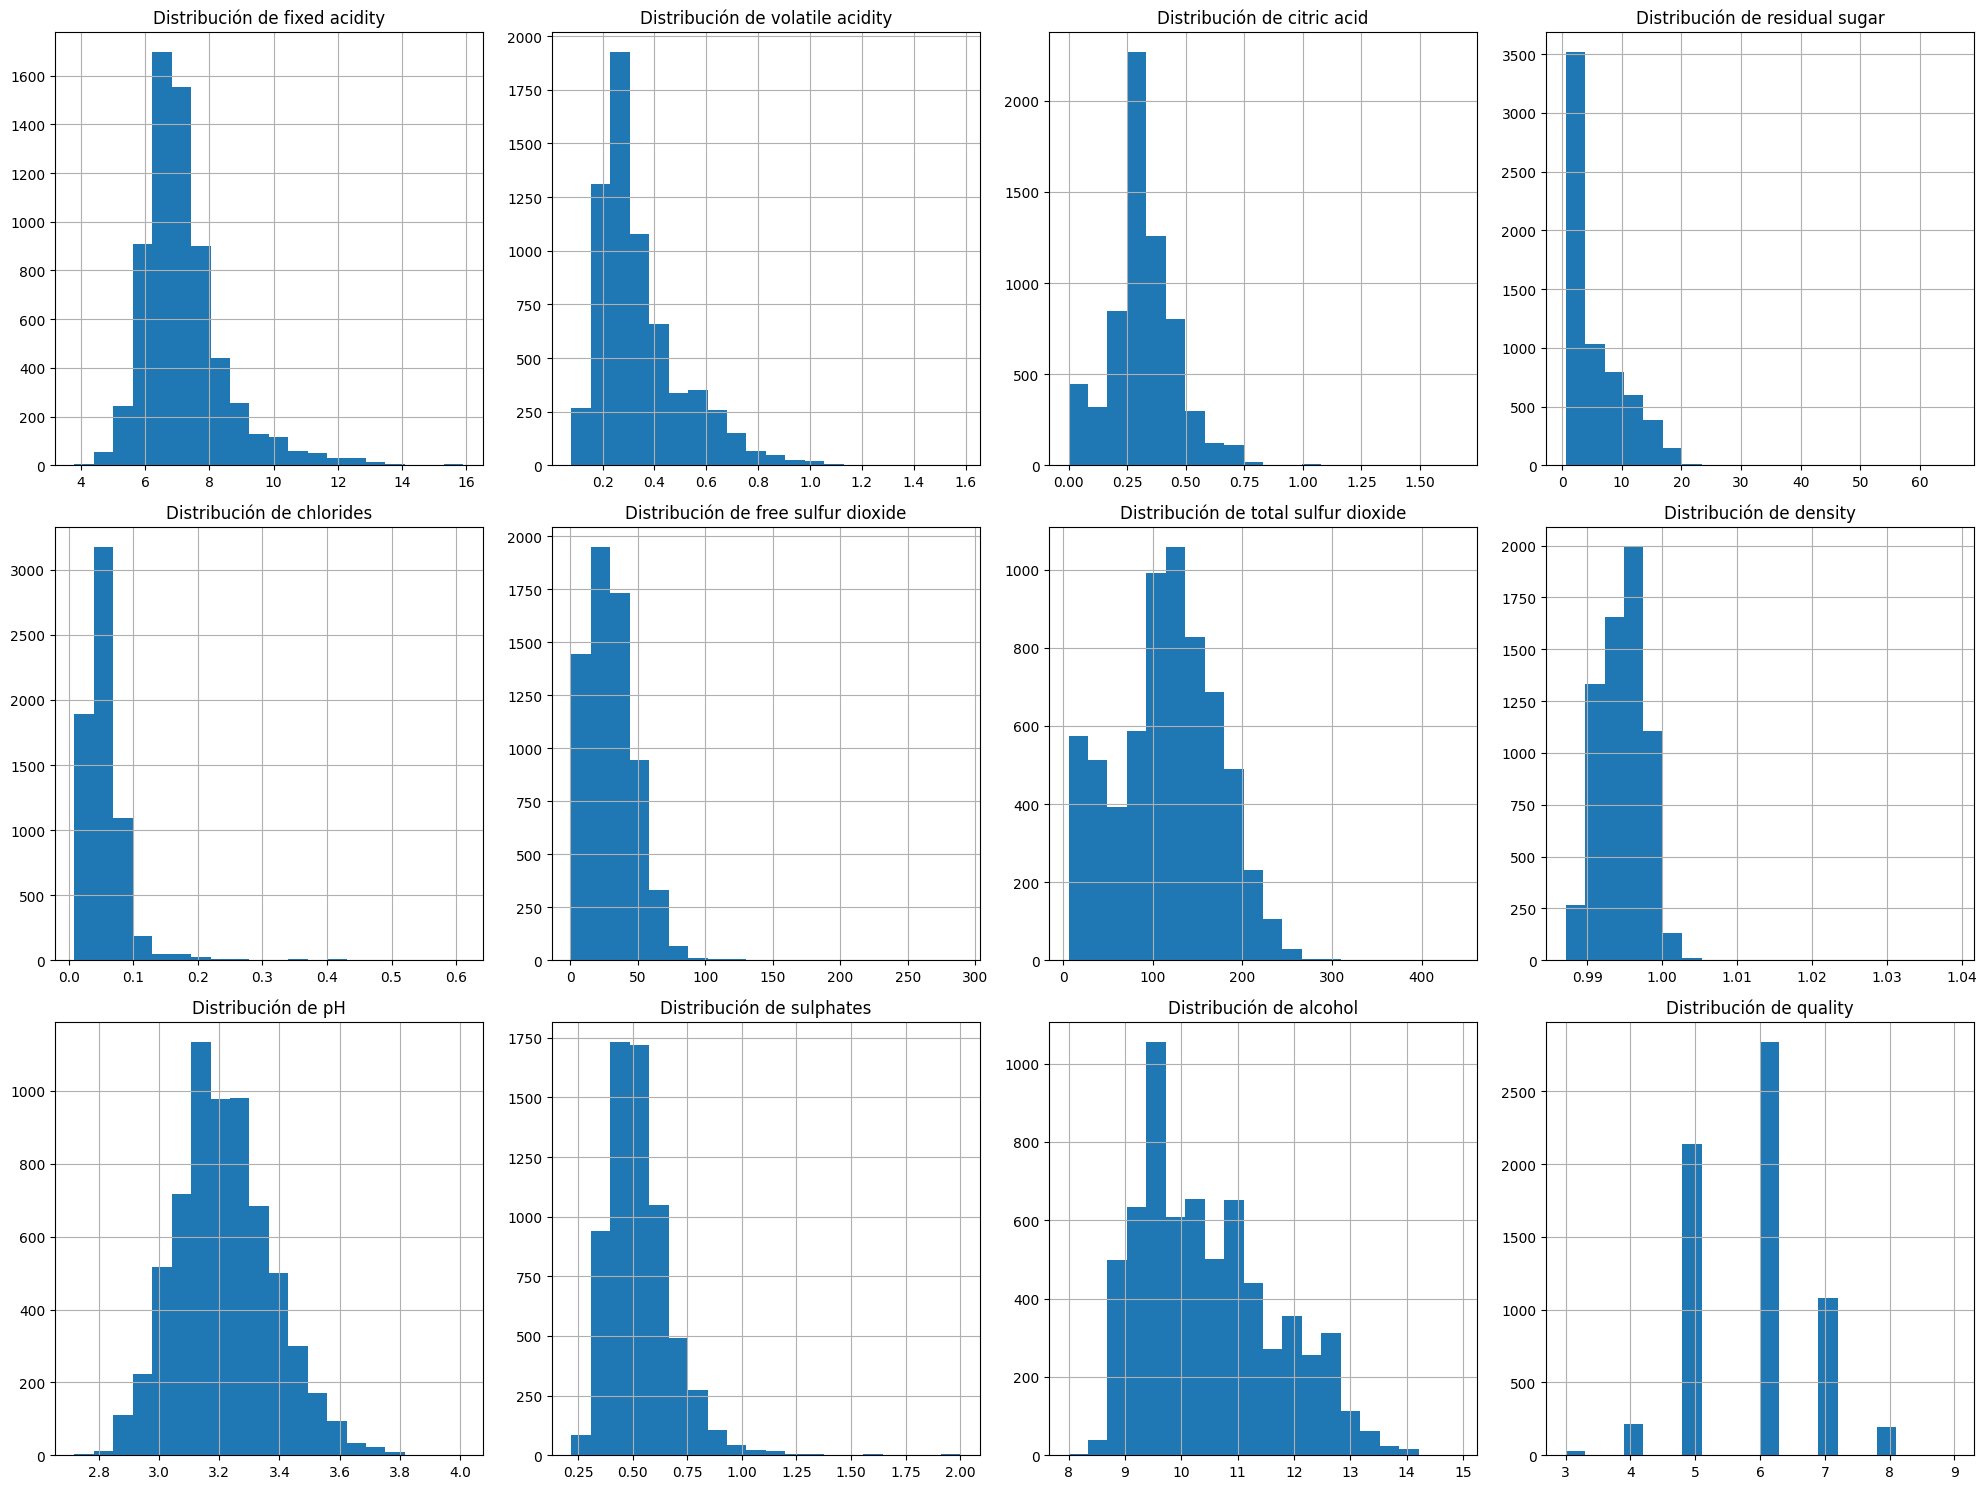

In [7]:
# Histogramas y boxplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # creo una figura con grilla 3x4 y tamaño cómodo
num_cols = df.select_dtypes(include=np.number).columns[:-1]  # tomo columnas numéricas, excluyo la última
for i, col in enumerate(num_cols):  # itero columnas numéricas seleccionadas
    row, col_idx = i // 4, i % 4  # calculo fila y columna dentro de la grilla 3x4
    df[col].hist(ax=axes[row, col_idx], bins=20)  # dibujo el histograma de la columna en el eje correspondiente
    axes[row, col_idx].set_title(f'Distribución de {col}')  # agrego título para identificar la variable
plt.tight_layout()  # ajusto espacios para evitar que los ejes/títulos se solapen
plt.show()  # muestro la figura

Las distribuciones muestran que muchas variables continuas están sesgadas La mayoría de valores se concentra cerca de 0, pero existen pocos valores mucho más altos que generan una cola hacia la derecha (sesgo a la derecha); típicamente la media supera a la mediana en estos casos, y alcohol es una variable ordinal con picos claros en 5, 6 y 7.

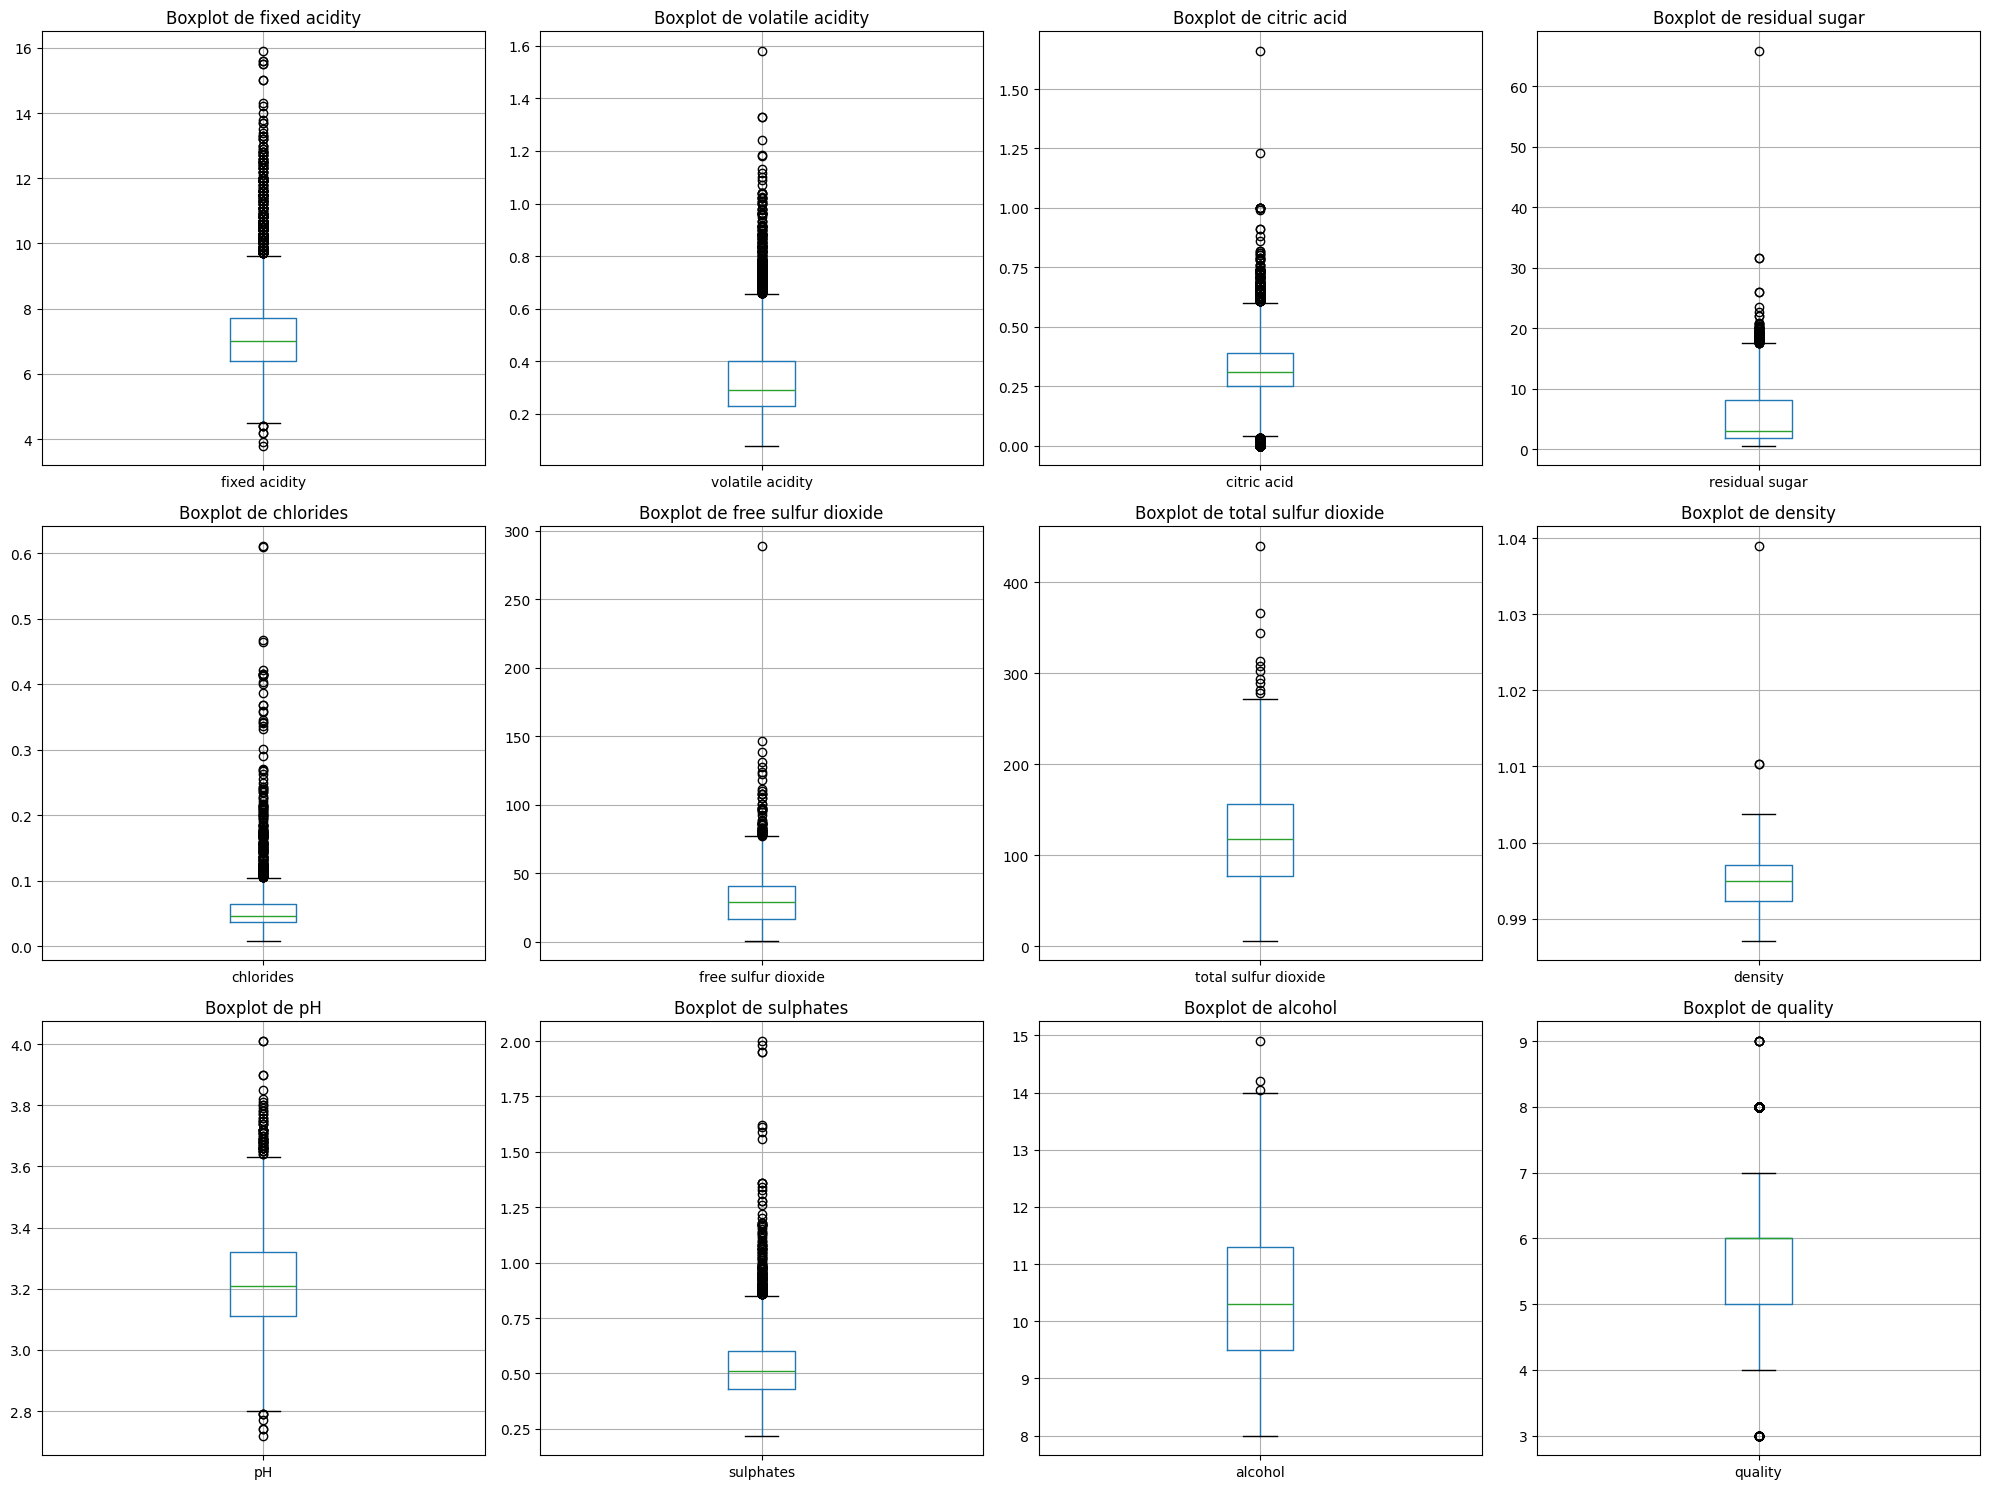

In [8]:
# Boxplots para outliers
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # creo una figura 3x4 para mostrar varios boxplots
num_cols = df.select_dtypes(include=np.number).columns[:-1]  # selecciono columnas numéricas y excluyo la última (ej. 'type' o 'alcohol')
for i, col in enumerate(num_cols):
    row, col_idx = i // 4, i % 4  # calculo fila/columna dentro de la grilla 3x4
    df.boxplot(column=col, ax=axes[row, col_idx])  # dibujo el boxplot de la columna en el eje correspondiente
    axes[row, col_idx].set_title(f'Boxplot de {col}')  # título para identificar la variable
plt.tight_layout()  # ajusto márgenes para que no se solapen los subplots
plt.show()  # muestro la figura

Estos boxplots muestran la distribución de cada variable numérica en el dataset. La caja representa el rango intercuartílico (IQR, del 25% al 75% de los datos), la línea central es la mediana, los bigotes se extienden hasta 1.5*IQR, y los puntos son outliers. Ayudan a detectar sesgos (ej. residual sugar está cerca de 0 pero existen algunos valores muy altos)

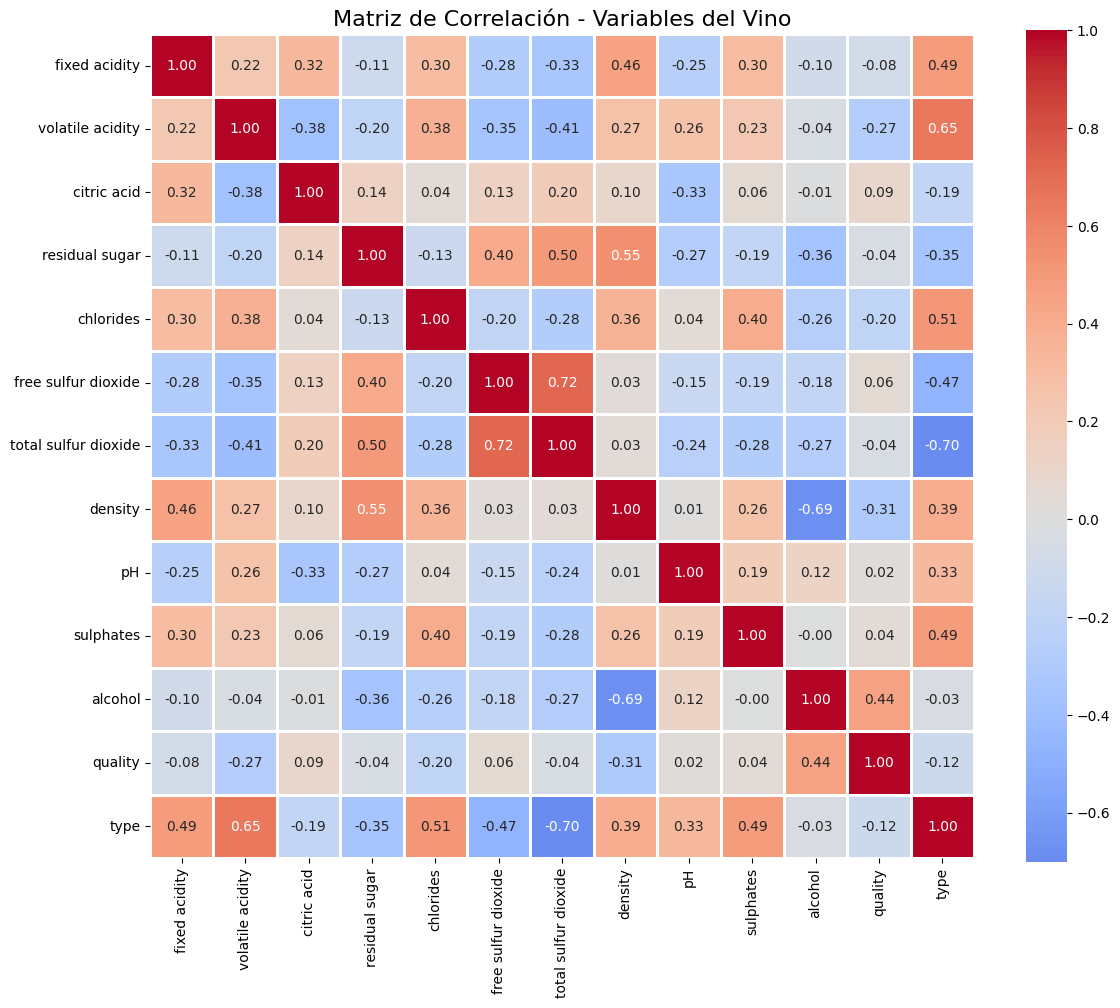


Correlación con el alcohol del vino:
alcohol                 1.000000
quality                 0.444319
pH                      0.121248
sulphates              -0.003029
citric acid            -0.010493
type                   -0.032970
volatile acidity       -0.037640
fixed acidity          -0.095452
free sulfur dioxide    -0.179838
chlorides              -0.256916
total sulfur dioxide   -0.265740
residual sugar         -0.359415
density                -0.686745
Name: alcohol, dtype: float64


In [9]:
# Calcular matriz de correlación
correlation_matrix = df.corr()  # calculo correlaciones (Pearson) entre las columnas numéricas del dataframe

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))  # creo figura grande para que las etiquetas y anotaciones se lean bien
sns.heatmap(
    correlation_matrix,
    annot=True,    # muestro los valores numéricos en cada celda
    cmap='coolwarm',
    center=0,      # centro la paleta en 0 para distinguir positiva/negativa
    fmt='.2f',     # formato con 2 decimales para las anotaciones
    square=True,
    linewidths=1)   # líneas entre celdas para mayor legibilidad

plt.title('Matriz de Correlación - Variables del Vino', fontsize=16)  # título claro
plt.tight_layout()  # ajusto márgenes para evitar solapamientos
plt.show()  # muestro el heatmap

# Correlaciones con la variable objetivo
print("\nCorrelación con el alcohol del vino:")
correlations_with_alcohol = correlation_matrix['alcohol'].sort_values(ascending=False)
# obtengo y ordeno las correlaciones respecto a 'alcohol' (de mayor a menor)
print(correlations_with_alcohol)  # imprimo la serie resultante (incluye alcohol=1.0)

Esta matriz de correlación visualiza las relaciones lineales entre todas las variables: colores rojos indican correlaciones positivas fuertes (ej. alcohol y quality ~0.44), azules negativas (ej. density y alcohol ~-0.69). ademas de que sirven para ver features relevantes para predecir alcohol. La lista ordena las correlaciones específicas de alcohol con las demás, confirmando density como la más inversa (alta densidad, bajo alcohol) y quality como la más directa.

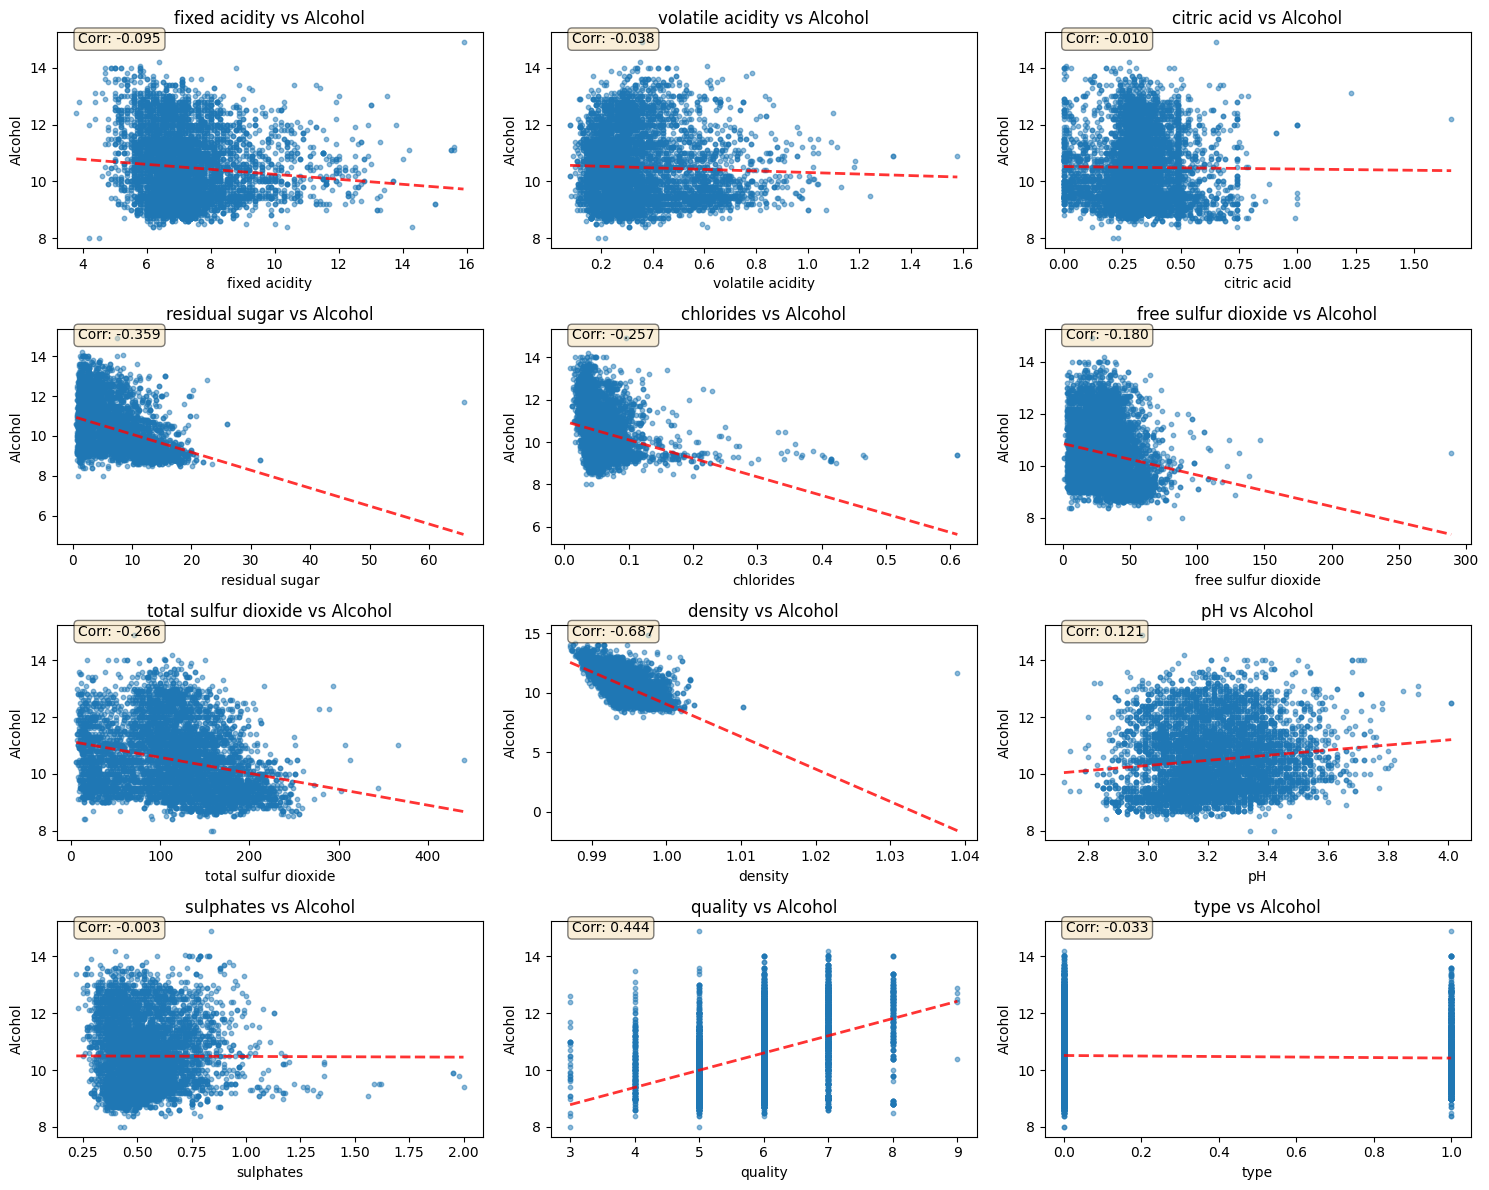

In [10]:
# Scatterplots de cada feature vs el alcohol, con línea de tendencia y valor de correlación
fig, axes = plt.subplots(4, 3, figsize=(15, 12))  # creo grilla 4x3 para los scatterplots
axes = axes.ravel()  # aplano la matriz de ejes para indexarla más fácilmente

features = [col for col in df.columns if col != 'alcohol']  # tomo todas las columnas excepto el target

for idx, col in enumerate(features):
    axes[idx].scatter(df[col], df['alcohol'], alpha=0.5, s=10)  # dibujo puntos (ligeramente transparentes)
    axes[idx].set_xlabel(col)  # pongo etiqueta en x con el nombre de la feature
    axes[idx].set_ylabel('Alcohol')  # etiqueta y fija para el target
    axes[idx].set_title(f'{col} vs Alcohol')  # título claro por subplot

    # Agregar línea de tendencia (regresión lineal simple)
    z = np.polyfit(df[col], df['alcohol'], 1)  # calculo coeficientes (pendiente, intercepto) de la recta
    p = np.poly1d(z)  # construyo el polinomio a partir de esos coeficientes
    # para que la línea quede ordenada en x la ploteo sobre los valores ordenados
    xs_sorted = df[col].sort_values()
    axes[idx].plot(xs_sorted, p(xs_sorted), "r--", alpha=0.8, linewidth=2)  # dibujo la recta punteada roja

    # Mostrar correlación entre la feature y alcohol
    corr = df[col].corr(df['alcohol'])  # calculo correlación Pearson
    # la muestro en coordenadas del eje (0 a 1), con un recuadro semi-transparente
    axes[idx].text(0.05, 0.95, f'Corr: {corr:.3f}',transform=axes[idx].transAxes,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Si hay menos features que subplots, oculto el último para que no se vea vacío
if len(features) < len(axes): axes[-1].axis('off')

plt.tight_layout()  # ajusto espacios para evitar solapamientos
plt.show()  # muestro todos los gráficos

Estos scatter plots ilustran la relación bivariada entre alcohol (variable objetivo en Y) y cada feature (en X), con puntos azules para los datos y líneas rojas de regresión lineal simple. Muestran correlaciones variables: positivas débiles (ej. quality ~0.44, vinos de mejor calidad tienden a más alcohol), negativas fuertes (ej. density aproximadamente -0.69, mayor densidad implica menos alcohol) y dispersas (ej. sulphates ~0.003, poca relación lineal)

In [11]:
print("=== ANÁLISIS DE RELACIONES LINEALES PRELIMINARES ===\n")  # imprimo encabezado para separar esta sección en la salida

# Variables con mayor correlación positiva
print("Variables con correlación positiva fuerte (> 0.2):")
positive_corr = correlations_with_alcohol[correlations_with_alcohol > 0.2]
# selecciono las variables cuya correlación con 'alcohol' es mayor a 0.2

for var, corr in positive_corr.items():
    if var != 'alcohol':  # evito mostrar la autocorrelación de 'alcohol' consigo misma
        print(f"  - {var}: {corr:.3f}")  # imprimo nombre de la variable y su correlación formateada

print("\nVariables con correlación negativa fuerte (< -0.2):")
negative_corr = correlations_with_alcohol[correlations_with_alcohol < -0.2]
# selecciono variables con correlación menor a -0.2 (relación negativa fuerte)

for var, corr in negative_corr.items(): print(f"  - {var}: {corr:.3f}")  # imprimo cada variable negativa con su valor de correlación

=== ANÁLISIS DE RELACIONES LINEALES PRELIMINARES ===

Variables con correlación positiva fuerte (> 0.2):
  - quality: 0.444

Variables con correlación negativa fuerte (< -0.2):
  - chlorides: -0.257
  - total sulfur dioxide: -0.266
  - residual sugar: -0.359
  - density: -0.687


Se destacan las correlaciones lineales más fuertes (|r| > 0.2) con alcohol: quality es la positiva principal (0.44, vinos de mejor calidad tienden a más alcohol), mientras density (-0.69), residual sugar (-0.36) y total sulfur dioxide (-0.27) son negativas (mayor densidad/azúcar/SO2 reduce el alcohol).

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

realizo el prepocesamiento

In [12]:
print('Duplicados encontrados:', df.duplicated().sum())  # Cuento las filas exactamente duplicadas (todas las columnas) y muestro el total

Duplicados encontrados: 1177


In [13]:
# Por robustez voy a eliminar duplicados y usar df limpio en las siguientes celdas
df = df.drop_duplicates().reset_index(drop=True)  # elimino filas idénticas (todas las columnas) y reindexo para tener índices consecutivos
print('Shape después de drop_duplicates():', df.shape)  # muestro (filas, columnas) para confirmar cambios
print('Duplicados después:', df.duplicated().sum())  # verifico que no queden duplicados (debería ser 0)

Shape después de drop_duplicates(): (5320, 13)
Duplicados después: 0


In [14]:
# verifico valores nulos
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


no se encontro ningun nulo

In [15]:
print("=== ANÁLISIS DE OUTLIERS ===")

outlier_info = {}  # guardo aquí el resumen de outliers por columna

# Nota: asumo que las columnas son numéricas; si hay columnas no numéricas, df[col].quantile() fallará.
for col in df.columns:
    Q1 = df[col].quantile(0.25)  # calculo primer cuartil (25%)
    Q3 = df[col].quantile(0.75)  # calculo tercer cuartil (75%)
    IQR = Q3 - Q1                # rango intercuartílico

    # defino los límites usuales para detectar outliers (1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # selecciono valores por debajo/por encima de los límites (esos son los outliers)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    # almaceno conteo, porcentaje y límites para referencia posterior
    outlier_info[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound}

    # imprimo resumen por columna: cuántos outliers y su porcentaje respecto al total
    print(f"{col}: {outlier_info[col]['count']} outliers ({outlier_info[col]['percentage']:.2f}%)")

=== ANÁLISIS DE OUTLIERS ===
fixed acidity: 304 outliers (5.71%)
volatile acidity: 279 outliers (5.24%)
citric acid: 143 outliers (2.69%)
residual sugar: 141 outliers (2.65%)
chlorides: 237 outliers (4.45%)
free sulfur dioxide: 44 outliers (0.83%)
total sulfur dioxide: 10 outliers (0.19%)
density: 3 outliers (0.06%)
pH: 49 outliers (0.92%)
sulphates: 163 outliers (3.06%)
alcohol: 1 outliers (0.02%)
quality: 183 outliers (3.44%)
type: 0 outliers (0.00%)


Este análisis lista el número y porcentaje de outliers por variable usando IQR (1.5*IQR). Fixed acidity (5.71%) y volatile acidity (5.24%) lideran, sugiriendo extremos en acidez que podrían sesgar el modelo; quality (3.44%) muestra variabilidad en puntuaciones, pero como es discreta, no impacta mucho. Decidí no removerlos para preservar la integridad de los datos reales (outliers podrían representar vinos extremos pero válidos), evitando asi perder parte de las muestras, priorizando simplicidad sobre ajustes complejos.

In [16]:
# Creo X con las features (quito 'alcohol' porque es la target).
X = df.drop(columns=['alcohol'])

# Extraigo y como target 'alcohol' (uso .copy() para evitar side-effects).
y = df['alcohol'].copy()

# Divido los datos en train (80%) y test (20%) — uso random_state para reproducibilidad y la dejo fija en 42 el cual suele ser el que se usa por defecto.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializo el escalador estándar (media=0, var=1).
scaler = StandardScaler()

# Ajusto el scaler con X_train y transformo X_train.
X_train_scaled = scaler.fit_transform(X_train)

# Transformo X_test usando los parámetros aprendidos del train (no vuelvo a ajustar).
X_test_scaled = scaler.transform(X_test)

# Imprimo las formas para confirmar que las transformaciones son correctas.
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (4256, 12)
X_test_scaled shape: (1064, 12)





## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


en este paso creo el modelo de regresion lineal

In [17]:
# Creo y entreno un modelo de regresión lineal con los datos de entrenamiento escalados.
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicción sobre el conjunto de entrenamiento.
y_train_pred = model.predict(X_train_scaled)

# Predicción sobre el conjunto de prueba.
y_test_pred = model.predict(X_test_scaled)

In [18]:
print("=== MÉTRICAS DE EVALUACIÓN ===\n")

# Calculo R² (coeficiente de determinación): indica qué proporción de la varianza
# del objetivo queda explicada por el modelo (1.0 es perfecto, 0 indica sin explicación).
r2_train = r2_score(y_train, y_train_pred)

# Calculo MSE (error cuadrático medio): promedio de los errores al cuadrado.
# Penaliza con más fuerza errores grandes; útil para ver impacto de outliers grandes.
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculo MAE (error absoluto medio): promedio de los errores absolutos.
# Más interpretable en las mismas unidades que la variable objetivo y menos sensible a outliers.
mae_train = mean_absolute_error(y_train, y_train_pred)

# Imprimo las métricas del conjunto de entrenamiento.
print("Conjunto de ENTRENAMIENTO:")
print(f"  R² Score: {r2_train:.4f}")
print(f"  MSE: {mse_train:.4f}")
print(f"  MAE: {mae_train:.4f}")

# Calculo las mismas métricas pero con los datos de prueba (no vistos) para evaluar generalización.
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Imprimo las métricas del conjunto de prueba.
print("\nConjunto de PRUEBA:")
print(f"  R² Score: {r2_test:.4f}")
print(f"  MSE: {mse_test:.4f}")
print(f"  MAE: {mae_test:.4f}")

# Calculo la diferencia de R² entre entrenamiento y prueba.
# - Si la diferencia absoluta es pequeña (< 0.05) se considera una heurística de buena generalización.
# - Si R²_train > R²_test por bastante, puede indicar overfitting (ajuste excesivo al train).
# - Si R²_test > R²_train (r2_diff < 0) es raro, pero puede indicar que el test es "más fácil" o azar.
print("\n=== ANÁLISIS DE GENERALIZACIÓN ===")
r2_diff = r2_train - r2_test

if abs(r2_diff) < 0.05:
    # Diferencia pequeña: el rendimiento entre train y test es similar.
    print(f"Diferencia R² (train-test): {r2_diff:.4f}")
    print("✓ El modelo generaliza bien (diferencia < 0.05)")
elif r2_diff > 0:
    # Train claramente mejor que test: posible sobreajuste.
    print(f"Diferencia R² (train-test): {r2_diff:.4f}")
    print("⚠ Posible overfitting leve (rendimiento en train > test)")
else:
    # Test mejor que train: poco común, se interpreta aquí como buena generalización,
    # pero conviene revisar el split de datos o varianza en los conjuntos.
    print(f"Diferencia R² (train-test): {r2_diff:.4f}")
    print("✓ Buena generalización (R² test >= R² train)")

=== MÉTRICAS DE EVALUACIÓN ===

Conjunto de ENTRENAMIENTO:
  R² Score: 0.8059
  MSE: 0.2686
  MAE: 0.3590

Conjunto de PRUEBA:
  R² Score: 0.8560
  MSE: 0.2154
  MAE: 0.3601

=== ANÁLISIS DE GENERALIZACIÓN ===
Diferencia R² (train-test): -0.0501
✓ Buena generalización (R² test >= R² train)


Estas métricas evalúan el rendimiento del modelo lineal: en entrenamiento, R²=0.806 y MSE=0.269 indican un ajuste moderado a los datos vistos; en prueba, R²=0.856 (explica ~86% de la varianza en alcohol), MSE=0.215 y MAE=0.360 muestran precisión en datos nuevos. La diferencia R² (train-test)=-0.050 es negativa (mejor en test), confirmando generalización excelente sin sobreajuste —el modelo predice bien vinos no vistos de manera efectiva.

In [19]:
# Crear DataFrame con el nombre de cada feature y su coeficiente aprendido por el modelo.
coefs = pd.DataFrame({'Feature': X.columns, 'Coef': model.coef_})

# Ordenar por la magnitud absoluta del coeficiente (features más influyentes primero) y mostrar el resultado.
coefs.sort_values('Coef', key=lambda s: s.abs(), ascending=False)

,Feature,Coef
7,density,-1.895390
3,residual sugar,1.034511
0,fixed acidity,0.662629
11,type,0.455092
8,pH,0.408436
9,sulphates,0.147348
1,volatile acidity,0.136552
10,quality,0.098745
2,citric acid,0.072698
5,free sulfur dioxide,-0.055779


Estos coeficientes del modelo lineal (ordenados por magnitud absoluta) indican el impacto relativo de cada feature en la predicción de alcohol: negativos reducen el alcohol estimado (ej. density -1.90, mayor densidad baja el alcohol, alineado con correlación -0.69), positivos lo aumentan (ej. residual sugar +1.03, más azúcar residual eleva el contenido). Features como fixed acidity (+0.66) y type (+0.46) son influyentes, mientras chlorides (-0.04) es marginal —revela que densidad y azúcar son los drivers clave en la ecuación del modelo

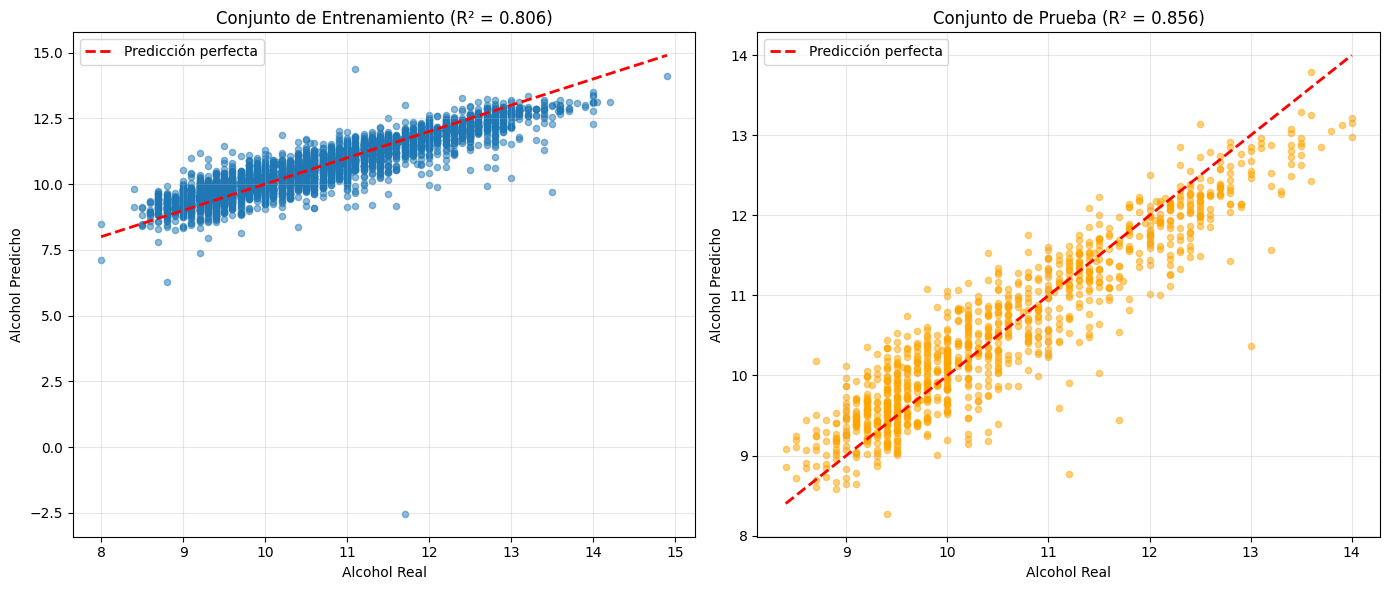

In [20]:
# Gráficos de predicción vs valores reales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico: conjunto de entrenamiento
# Scatter: valores reales (x) frente a valores predichos (y)
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20)
# Línea punteada roja que representa predicción perfecta (y = x)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'r--', lw=2, label='Predicción perfecta')
# Etiquetas y título (incluye R² del entrenamiento para referencia)
axes[0].set_xlabel('Alcohol Real')
axes[0].set_ylabel('Alcohol Predicho')
axes[0].set_title(f'Conjunto de Entrenamiento (R² = {r2_train:.3f})')
axes[0].legend()
# Cuadrícula ligera para facilitar la lectura de la dispersión
axes[0].grid(True, alpha=0.3)

# Gráfico: conjunto de prueba
# Scatter para test (uso color distinto para diferenciarlos visualmente)
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='orange')
# Misma línea de referencia perfecta (y = x)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', lw=2, label='Predicción perfecta')
# Etiquetas y título (incluye R² del test para evaluación de generalización)
axes[1].set_xlabel('Alcohol Real')
axes[1].set_ylabel('Alcohol Predicho')
axes[1].set_title(f'Conjunto de Prueba (R² = {r2_test:.3f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Ajuste de layout para evitar solapamientos y mostrar la figura
plt.tight_layout()
plt.show()

Estos scatter plots comparan alcohol real (eje X) vs predicho (eje Y): puntos cerca de la línea roja (y=x) indican alta precisión. En entrenamiento (azul, R²=0.806), los puntos siguen bien la tendencia con dispersión moderada; en prueba (naranja, R²=0.856), la nube es más ajustada, mostrando generalización excelente —el modelo predice alcohol de vinos no vistos con error bajo, sin sesgos evidentes.


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

In [21]:
# hago una copia del DataFrame 'coefs' para no modificar el original.
importance_coefs = coefs.copy()

# agrego una columna con el valor absoluto de cada coeficiente (importancia por magnitud).
importance_coefs['Abs Coef'] = importance_coefs['Coef'].abs()

# ordeno por magnitud absoluta descendente para ver las features más influyentes primero.
importance_coefs = importance_coefs.sort_values('Abs Coef', ascending=False)

# visualizo el DataFrame ordenado.
importance_coefs

,Feature,Coef,Abs Coef
7,density,-1.895390,1.895390
3,residual sugar,1.034511,1.034511
0,fixed acidity,0.662629,0.662629
11,type,0.455092,0.455092
8,pH,0.408436,0.408436
9,sulphates,0.147348,0.147348
1,volatile acidity,0.136552,0.136552
10,quality,0.098745,0.098745
2,citric acid,0.072698,0.072698
5,free sulfur dioxide,-0.055779,0.055779


Estos coeficientes del modelo lineal (ordenados por valor absoluto) revelan la influencia de cada feature en la predicción de alcohol: los de mayor magnitud dominan (density -1.90: fuerte efecto negativo, alta densidad reduce alcohol; residual sugar +1.03: positivo, más azúcar eleva el contenido). Positivos como fixed acidity (+0.66) y type (+0.46) impulsan el alcohol, mientras negativos menores como chlorides (-0.04) tienen impacto marginal —destaca que densidad y azúcar residual son los predictores clave, alineados con correlaciones previas.

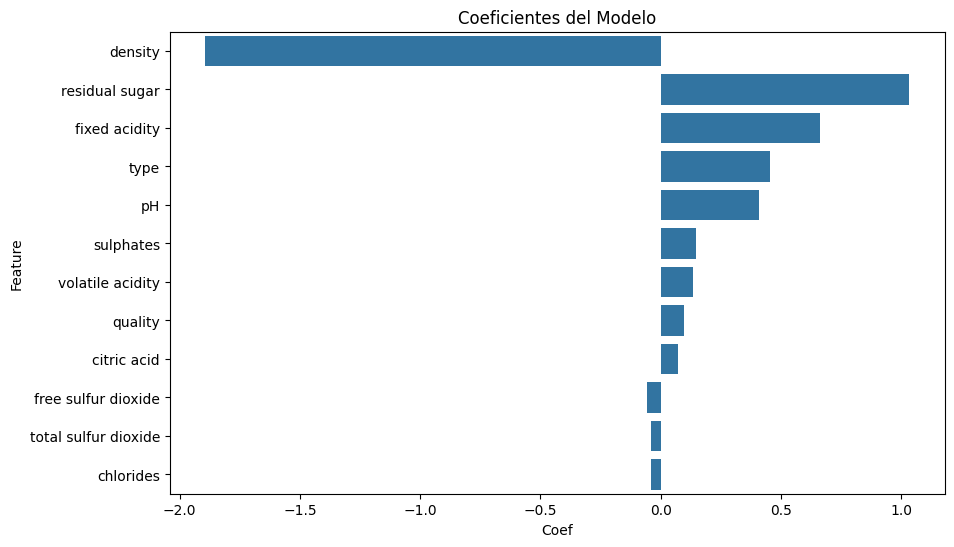

In [22]:
# creo una figura con tamaño 10x6 pulgadas.
plt.figure(figsize=(10, 6))

# dibujo un barplot con los coeficientes en el eje x y las features en el eje y.
sns.barplot(data=importance_coefs, x='Coef', y='Feature')

# titulo descriptivo del gráfico.
plt.title('Coeficientes del Modelo')

# rederizo el gráfico.
plt.show()

Este gráfico de barras horizontales visualiza los coeficientes del modelo lineal, ordenados por magnitud: barras positivas indican features que incrementan el alcohol predicho, negativas lo disminuyen, se destaca que densidad y azúcar residual dominan la ecuación, mientras features como chlorides son marginales, lo cual facilita interpretar la importancia relativa que tienen.

In [23]:
from sklearn.inspection import permutation_importance  # importo la función para medir importancia por permutación

# Calculo la importancia por permutación sobre el test escalado usando el modelo ya entrenado
# n_repeats=10 -> repito la permutación 10 veces para estabilizar la estimación
perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Creo un DataFrame con la media de importancias por feature
perm_df = pd.DataFrame({
    'Feature': X.columns,  # uso los nombres originales de las columnas
    'Importance': perm_importance.importances_mean})  # promedio de las importancias obtenidas en las repeticiones

# Agrego la desviación estándar para ver la variabilidad entre repeticiones
perm_df['Std'] = perm_importance.importances_std

# Ordeno de mayor a menor importancia para ver las features más relevantes primero
perm_df = perm_df.sort_values('Importance', ascending=False)

# Muestro el resultado ordenado (feature, importancia media, std)
perm_df

,Feature,Importance,Std
7,density,4.624276,0.131456
3,residual sugar,1.216991,0.037284
0,fixed acidity,0.624604,0.031153
11,type,0.287580,0.010547
8,pH,0.223292,0.009505
9,sulphates,0.030036,0.002138
1,volatile acidity,0.023819,0.002630
10,quality,0.017034,0.002707
2,citric acid,0.009600,0.001340
5,free sulfur dioxide,0.005059,0.000662


Esta tabla de importancia de features ordena los predictores por impacto en la precisión del modelo: density domina (4.62, desv. 0.13, ~13% de variabilidad), seguida de residual sugar (1.22), destacando su rol clave en explicar alcohol —features menores como chlorides (0.002) aportan poco, sugiriendo potencial para selección variable y simplificación del modelo.

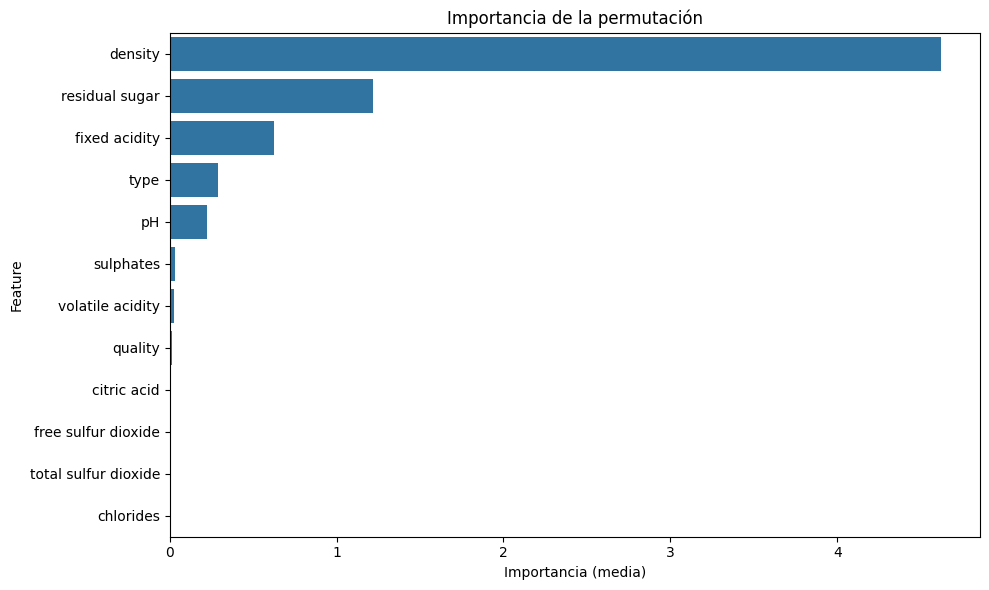

In [24]:
plt.figure(figsize=(10, 6))  # creo una figura amplia para que las barras se vean claras
sns.barplot(data=perm_df, x='Importance', y='Feature')  # dibujo barras horizontales: importancia en x, feature en y
plt.title('Importancia de la permutación')  # título claro del gráfico
plt.xlabel('Importancia (media)')  # etiqueta del eje x para entender la medida
plt.ylabel('Feature')  # etiqueta del eje y
plt.tight_layout()  # ajusto márgenes para evitar solapamientos
plt.show()  # muestro la figura

Este gráfico de barras horizontales muestra la importancia de permutación (promedio) de cada feature


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

#### ¿Cuáles variables son más importantes según el modelo?


Según los coeficientes del modelo lineal (ordenados por valor absoluto) y la importancia de permutación (que mide cuánto degrada la precisión al alterar cada feature), las variables más importantes son:

1. Density: Coef. -1.90 (abs. 1.90), Importancia 4.62 —el driver principal, con fuerte efecto negativo.
2. Residual sugar: Coef. +1.03 (abs. 1.03), Importancia 1.22 —segunda en impacto, efecto positivo.
3. Fixed acidity: Coef. +0.66 (abs. 0.66), Importancia 0.62 —tercera, con influencia moderada positiva.
4. Otras notables: Type (+0.46, imp. 0.29) y pH (+0.41, imp. 0.22).

#### ¿Coincide con su análisis exploratorio?

Mayormente si coinciden, por ejemplo density encaja perfecto con su correlación negativa fuerte (-0.69) vista en la matriz y scatters, confirmando su rol principal, residual sugar también destaca por su corr. negativa (-0.36), aunque el modelo le da un efecto positivo —probablemente por multicolinealidad (ej. con density) o el escalado, que ajusta efectos indirectos, fixed acidity (corr. débil -0.10) gana peso en el modelo gracias a interacciones con otras variables, quality (corr. +0.44, alta al inicio) pierde fuerza (imp. 0.02) quizas por su distribución discreta y baja varianza, pero en resumen, se validan las relaciones clave del EDA, pero el modelo las afina con todas las variables juntas.

#### ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?

Sí, el modelo tiene buen rendimiento general:

R²: Train 0.806, Test 0.856 alto (explica ~86% de la varianza en alcohol en datos no vistos), y mejor en test indica generalización sólida (diferencia -0.05, sin sobreajuste).

MSE/MAE: Train MSE 0.269/MAE 0.359; Test MSE 0.215/MAE 0.360 valores que son bajos.

Los scatters de predicción vs. valores reales muestran puntos bien alineados a la línea, con dispersión moderada y sin sesgos evidentes.

Por lo cual no hay problemas graves; el R² >0.8 es sólido para regresión lineal en este dataset, talvez se lo podria mejorar cambiando la semilla fija en la division de los datos, se podria utilizar un algoritmo para buscar cual es la que da una mayor tasa de efectividad y utilizarla ya que cambiar el random_state suele dar otra distribucion de los datos lo cual cambia el resultado.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [25]:
# selecciono features con coeficiente absoluto >= 0.05
high_imp_features = importance_coefs[importance_coefs['Abs Coef'] >= 0.05]['Feature']

# Creo nuevos DataFrames solo con las columnas importantes
X_train_bonus_df = X_train[high_imp_features]  # tomo solo las columnas seleccionadas del set de entrenamiento
X_test_bonus_df = X_test[high_imp_features]    # tomo las mismas columnas del set de test

# Escalo los nuevos DataFrames (fit sobre train, transform sobre test)
scaler_bonus = StandardScaler()
X_train_scaled_bonus = scaler_bonus.fit_transform(X_train_bonus_df)  # ajusto scaler en train y transformo
X_test_scaled_bonus = scaler_bonus.transform(X_test_bonus_df)        # uso el mismo scaler para test

# Entreno un modelo lineal con las features seleccionadas y evalúo en test
model_bonus = LinearRegression()
model_bonus.fit(X_train_scaled_bonus, y_train)          # ajusto el modelo con los datos escalados de entrenamiento
y_test_pred_bonus = model_bonus.predict(X_test_scaled_bonus)  # predigo sobre el set de prueba escalado

# Calculo R² para evaluar rendimiento
r2_bonus = r2_score(y_test, y_test_pred_bonus)
print(f'R² Bonus: {r2_bonus:.3f}')  # imprimo R² con 3 decimales para comparación rápida

R² Bonus: 0.857


Eliminando variables poco relevantes, no mejoro practicamente el modelo


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  


# TP2 MLP
2.1 Usar MLP con la librería MLP.

2.2 Presentar un caso donde la MLP sobreajuste.

2.3 Presentar un caso donde la MLP subajuste.

2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

Tanto para 2.2, 2.3 y 2.4 deberá entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperparámetros.

Debe indicar las métricas de evaluación de los modelos e indicar como determina si sobreajusta (overfeatting) o si subajusta (underfitting)

2.5 Agregue sus conclusiones comparando la experiencia y resultados del modelo de regresión lineal con el modelo del punto 2.4

### Nota: se debe ejecutar todo el codigo anterior para poder continuar con esta parte del TP, ya que usare las variables de entrenamiento y testeo creadas anteriormente

In [26]:
from sklearn.neural_network import MLPRegressor # Importo el modelo de red neuronal MLP para regresión

In [27]:
# Asumimos que el notebook del TP1 (Regresión Lineal) ya fue ejecutado.
# Por ende, el DataFrame ya está cargado y preprocesado, ademas de incluir la división en train/test y el escalado en las variables.
# revizo el tamaño de las variables
print(f"Tamaño de X_train_scaled:{X_train_scaled.shape}")
print(f"Tamaño de X_test_scaled:{X_test_scaled.shape}")

Tamaño de X_train_scaled:(4256, 12)
Tamaño de X_test_scaled:(1064, 12)


In [28]:
# funciones auxiliares para entrenar y calcular métricas
def metrics(y_true, y_pred):
    # calculo R² con r2_score entre valores reales y predichos
    r2 = r2_score(y_true, y_pred)
    # calculo error cuadrático medio entre valores reales y predichos
    mse = mean_squared_error(y_true, y_pred)
    # calculo error absoluto medio entre valores reales y predichos
    mae = mean_absolute_error(y_true, y_pred)
    # devuelvo un diccionario con las métricas calculadas
    return {"r2": r2, "mse": mse, "mae": mae}

def entrenar_e_imprimir(model, X_tr, y_tr, X_te, y_te, nombre="modelo"):
    # entreno el modelo con los datos de entrenamiento
    model.fit(X_tr, y_tr)

    # predigo sobre el conjunto de entrenamiento
    y_pred_tr = model.predict(X_tr)
    # predigo sobre el conjunto de test
    y_pred_te = model.predict(X_te)

    # calculo métricas para las predicciones del conjunto de entrenamiento
    m_tr = metrics(y_tr, y_pred_tr)
    # calculo métricas para las predicciones del conjunto de test
    m_te = metrics(y_te, y_pred_te)

    # imprimo un encabezado con el nombre del modelo
    print(f"\n== {nombre} ==")

    # imprimo R² para train y test con 4 decimales
    print(f"R2   -> train: {m_tr['r2']:.4f} | test: {m_te['r2']:.4f}")

    # imprimo MSE para train y test con 4 decimales
    print(f"MSE -> train: {m_tr['mse']:.4f} | test: {m_te['mse']:.4f}")

    # imprimo MAE para train y test con 4 decimales
    print(f"MAE  -> train: {m_tr['mae']:.4f} | test: {m_te['mae']:.4f}")

    # calculo la diferencia de R² (train - test) y la asigno a DR2 usando el operador walrus
    print(f"Diferencia R² -> (train-test): {(DR2 := m_tr['r2'] - m_te['r2']):.4f}")

    # devuelvo un diccionario con nombre, modelo entrenado, métricas y predicciones
    return {"name": nombre,             # nombre identificador del modelo
            "model": model,             # instancia del modelo ya entrenado
            "m_tr": m_tr,               # métricas en entrenamiento (diccionario)
            "m_te": m_te,               # métricas en test (diccionario)
            "y_pred_tr": y_pred_tr,     # predicciones sobre el conjunto de entrenamiento
            "y_pred_te": y_pred_te,     # predicciones sobre el conjunto de test
            "diferencia_R2": DR2}        # diferencia de R² (train - test)

# MLP sobreajuste

In [29]:
# definiciones de configuraciones de capas pensadas para provocar overfitting (cada tupla = tamaños de las capas ocultas)
overfit_hidden_layer_configurations = [(100, 70, 50),     # 3 capas, complejidad moderada-alta
                                      (150, 100, 70),    # 3 capas, mayor complejidad
                                      (200, 150, 100),   # 3 capas, aún más compleja
                                      (250, 200, 150),   # 3 capas, alta complejidad
                                      (300, 250, 200),   # 3 capas, muy alta complejidad
                                      (350, 300, 250),   # 3 capas, extremadamente compleja
                                      (400, 350, 300)]    # 3 capas, máxima complejidad para overfitting

# inicializo la variable que guardará la máxima diferencia R² (train - test) encontrada
max_DR2 = 0
# inicializo la variable que guardará la configuración de capas que produce mayor sobreajuste
layers_overfit = 0

# Listas para recopilar las métricas y luego graficarlas
mse_train_list_overfit = []   # MSE en entrenamiento para cada configuración
mse_test_list_overfit = []    # MSE en test para cada configuración
r2_train_list_overfit = []    # R² en entrenamiento para cada configuración
r2_test_list_overfit = []     # R² en test para cada configuración
mae_train_list_overfit = []   # MAE en entrenamiento para cada configuración
mae_test_list_overfit = []    # MAE en test para cada configuración

# etiquetas para el eje X en los gráficos (convierto cada tupla a string)
config_labels_overfit = [f"{layer}" for layer in overfit_hidden_layer_configurations]

# itero sobre cada configuración de capas ocultas
for i, layer in enumerate(overfit_hidden_layer_configurations):
    # creo un MLP con baja regularización y muchas iteraciones, configuración propensa a sobreajustar
    mlp_overfitting = MLPRegressor(
        hidden_layer_sizes=layer,     # arquitectura de capas ocultas actual
        activation='relu',            # función de activación no lineal
        solver='adam',                # optimizador adaptativo
        alpha=1e-7,                   # regularización extremadamente baja -> favorece overfitting
        max_iter=10000,               # permito muchas iteraciones para converger/overfitear
        random_state=42)

    # entreno el modelo y obtengo métricas y predicciones usando la función auxiliar
    res = entrenar_e_imprimir(
        mlp_overfitting,
        X_train_scaled, y_train,
        X_test_scaled, y_test,
        f"MLP - Overfitting model {i}, con hidden_layer_sizes = {layer}")

    # agrego las métricas (MSE y R²) a las listas para su posterior análisis/gráficos
    mse_train_list_overfit.append(res['m_tr']['mse'])
    mse_test_list_overfit.append(res['m_te']['mse'])
    r2_train_list_overfit.append(res['m_tr']['r2'])
    r2_test_list_overfit.append(res['m_te']['r2'])
    mae_train_list_overfit.append(res['m_tr']["mae"])
    mae_test_list_overfit.append(res['m_te']["mae"])

    # si la diferencia R² (train - test) de este modelo es mayor que la máxima registrada, actualizo
    if res["diferencia_R2"] > max_DR2:
        max_DR2 = res["diferencia_R2"]
        layers_overfit = layer

# imprimo resumen con la mayor diferencia R² encontrada y la configuración asociada
print(f"\nDiferencia máxima de R2 encontrada: {max_DR2:.4f}")
print(f"Modelo con más sobreajuste (hidden_layer_sizes) = {layers_overfit}")


== MLP - Overfitting model 0, con hidden_layer_sizes = (100, 70, 50) ==
R2   -> train: 0.9259 | test: 0.8908
MSE -> train: 0.1025 | test: 0.1634
MAE  -> train: 0.2481 | test: 0.3125
Diferencia R² -> (train-test): 0.0351

== MLP - Overfitting model 1, con hidden_layer_sizes = (150, 100, 70) ==
R2   -> train: 0.9615 | test: 0.8500
MSE -> train: 0.0532 | test: 0.2243
MAE  -> train: 0.1818 | test: 0.3444
Diferencia R² -> (train-test): 0.1115

== MLP - Overfitting model 2, con hidden_layer_sizes = (200, 150, 100) ==
R2   -> train: 0.9231 | test: 0.8696
MSE -> train: 0.1065 | test: 0.1950
MAE  -> train: 0.2524 | test: 0.3309
Diferencia R² -> (train-test): 0.0534

== MLP - Overfitting model 3, con hidden_layer_sizes = (250, 200, 150) ==
R2   -> train: 0.9303 | test: 0.8903
MSE -> train: 0.0965 | test: 0.1641
MAE  -> train: 0.2415 | test: 0.3043
Diferencia R² -> (train-test): 0.0400

== MLP - Overfitting model 4, con hidden_layer_sizes = (300, 250, 200) ==
R2   -> train: 0.9681 | test: 0.8888

En este experimento se diseñaron MLP deliberadamente grandes para provocar sobreajuste y evaluar su impacto: todos los modelos muestran un R² de entrenamiento muy alto (≈0.92–0.97) pero un R² en test notablemente menor (≈0.85–0.90), lo que indica que las redes están aprendiendo patrones específicos del conjunto de entrenamiento que no generalizan bien. El caso más extremo es el modelo (150, 100, 70), con la mayor diferencia R² (train−test = 0.1115); además sus errores absolutos y cuadrados aumentan mucho en test (MSE_train 0.0532 vs MSE_test 0.2243; MAE_train 0.1818 vs MAE_test 0.3444), confirmando el sobreajuste.

indicadores que resaltan el sobreajuste

R²_train elevado y R²_test notablemente más bajo en todos los casos → sobreajuste consistente.

MSE_train mucho menor que MSE_test (por ejemplo 0.0532 vs 0.2243 en el modelo (150,100,70)) → error de generalización.

La diferencia máxima R² = 0.1115 muestra un sobreajuste moderado pero real; otras configuraciones presentan brechas menores aunque igualmente significativas.

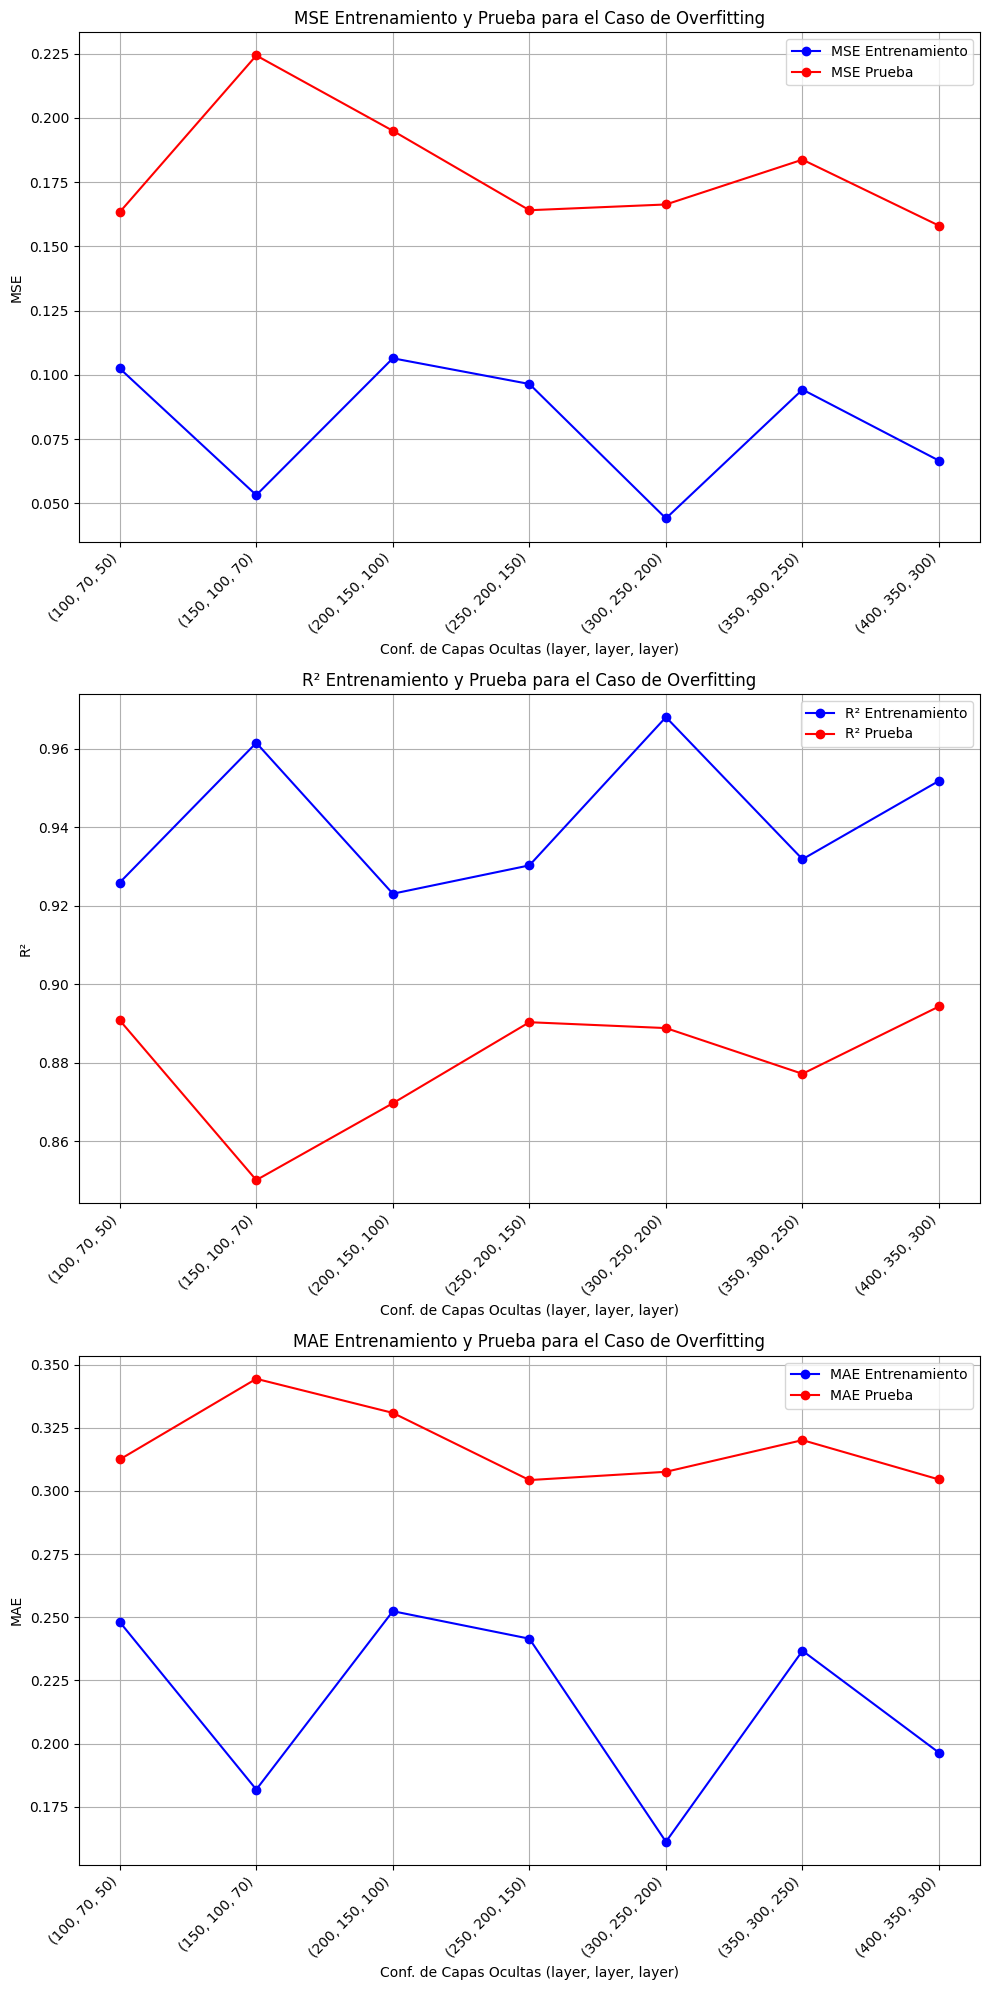

In [30]:
# creo las figuras para cada metrica
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# ---------------------
# Gráfico superior: MSE
# ---------------------

# trazo MSE de entrenamiento como línea con marcadores
axs[0].plot(range(len(config_labels_overfit)), mse_train_list_overfit, marker='o', color='blue', label='MSE Entrenamiento')
# trazo MSE de prueba como línea con marcadores
axs[0].plot(range(len(config_labels_overfit)), mse_test_list_overfit, marker='o', color='red', label='MSE Prueba')
# establezco el título del subplot superior
axs[0].set_title('MSE Entrenamiento y Prueba para el Caso de Overfitting')
# etiqueto el eje X del subplot superior
axs[0].set_xlabel('Conf. de Capas Ocultas (layer, layer, layer)')
# etiqueto el eje Y del subplot superior
axs[0].set_ylabel('MSE')
# defino las posiciones de las marcas del eje X (0..n-1)
axs[0].set_xticks(range(len(config_labels_overfit)))
# asigno las etiquetas (las tuplas de configuración) y las roté para mejor lectura
axs[0].set_xticklabels(config_labels_overfit, rotation=45, ha='right')
# muestro la leyenda para distinguir entrenamiento vs prueba
axs[0].legend()
# activo la cuadrícula para facilitar la lectura de valores
axs[0].grid(True)

# ---------------------
# Gráfico inferior: R²
# ---------------------

# trazo R² de entrenamiento como línea con marcadores
axs[1].plot(range(len(config_labels_overfit)), r2_train_list_overfit, marker='o', color='blue', label='R² Entrenamiento')
# trazo R² de prueba como línea con marcadores
axs[1].plot(range(len(config_labels_overfit)), r2_test_list_overfit, marker='o', color='red', label='R² Prueba')
# establezco el título del subplot inferior
axs[1].set_title('R² Entrenamiento y Prueba para el Caso de Overfitting')
# etiqueto el eje X del subplot inferior
axs[1].set_xlabel('Conf. de Capas Ocultas (layer, layer, layer)')
# etiqueto el eje Y del subplot inferior
axs[1].set_ylabel('R²')
# defino las posiciones de las marcas del eje X (0..n-1)
axs[1].set_xticks(range(len(config_labels_overfit)))
# asigno las etiquetas (las tuplas de configuración) y las roté para mejor lectura
axs[1].set_xticklabels(config_labels_overfit, rotation=45, ha='right')
# muestro la leyenda para distinguir entrenamiento vs prueba
axs[1].legend()
# activo la cuadrícula para facilitar la lectura de valores
axs[1].grid(True)

# ---------------------
# Gráfico 3: MAE
# ---------------------

# trazo MAE de entrenamiento y prueba (igual estilo que los anteriores)
axs[2].plot(range(len(config_labels_overfit)), mae_train_list_overfit, marker='o', color='blue', label='MAE Entrenamiento')
axs[2].plot(range(len(config_labels_overfit)), mae_test_list_overfit, marker='o', color='red', label='MAE Prueba')
# título y etiquetas
axs[2].set_title('MAE Entrenamiento y Prueba para el Caso de Overfitting')
axs[2].set_xlabel('Conf. de Capas Ocultas (layer, layer, layer)')
axs[2].set_ylabel('MAE')
# marcas x y etiquetas rotadas
axs[2].set_xticks(range(len(config_labels_overfit)))
axs[2].set_xticklabels(config_labels_overfit, rotation=45, ha='right')
# leyenda y grid
axs[2].legend()
axs[2].grid(True)

# ajusto el layout para evitar solapamientos entre subplots y etiquetas
plt.tight_layout()
# muestro la figura en pantalla
plt.show()

En los gráficos se observa claramente el efecto de sobreajuste: las curvas azules (MSE, MAE y R² en entrenamiento) muestran rendimiento muy alto (bajo MSE/MAE y R² cercano a 1), mientras que las curvas rojas (MSE, MAE y R² en prueba) permanecen consistentemente peores, lo que indica que los modelos están memorizando el conjunto de entrenamiento y no generalizan bien. El caso más evidente es la configuración (150, 100, 70), que presenta el mayor salto entre entrenamiento y prueba R²_train = 0.9615 vs R²_test = 0.8500 (ΔR² = 0.1115), MSE_train = 0.0532 vs MSE_test = 0.2243 y MAE_train = 0.1818 vs MAE_test = 0.3444, confirmando el sobreajuste. También se ve que aumentar la capacidad de la red no garantiza mejor generalización, ya que algunas arquitecturas más grandes suben R²_train y reducen MSE_train/MAE_train, pero no mejoran R²_test ni reducen MSE_test/MAE_test de forma consistente, por ende, estos resultados muestran que la capacidad del MLP supera la información disponible en los datos y produce una brecha de generalización.

# MLP subajuste


== MLP - Underfitting model 0, con hidden_layer_sizes = (1,) ==
R2   -> train: -81.1298 | test: -75.2015
MSE -> train: 113.6504 | test: 113.9702
MAE  -> train: 10.5957 | test: 10.6054
Diferencia R² -> (train-test): -5.9283


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


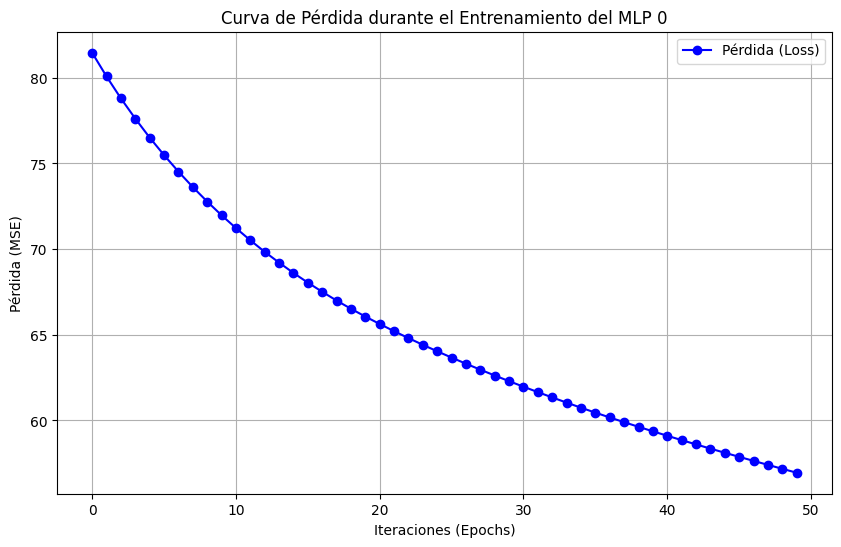


== MLP - Underfitting model 1, con hidden_layer_sizes = (3,) ==
R2   -> train: -11.3731 | test: -10.4480
MSE -> train: 17.1217 | test: 17.1221
MAE  -> train: 3.4037 | test: 3.4001
Diferencia R² -> (train-test): -0.9250


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


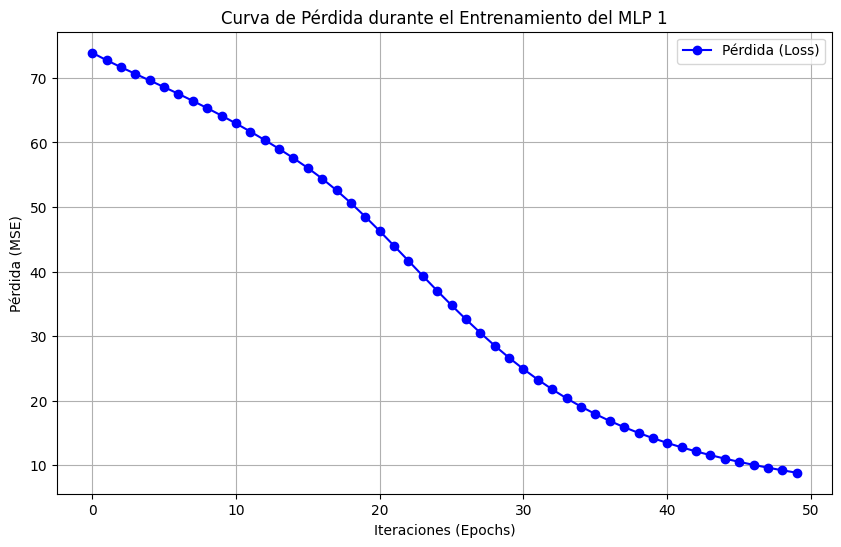


== MLP - Underfitting model 2, con hidden_layer_sizes = (6,) ==
R2   -> train: -5.6986 | test: -5.3868
MSE -> train: 9.2694 | test: 9.5523
MAE  -> train: 2.3901 | test: 2.3885
Diferencia R² -> (train-test): -0.3118


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


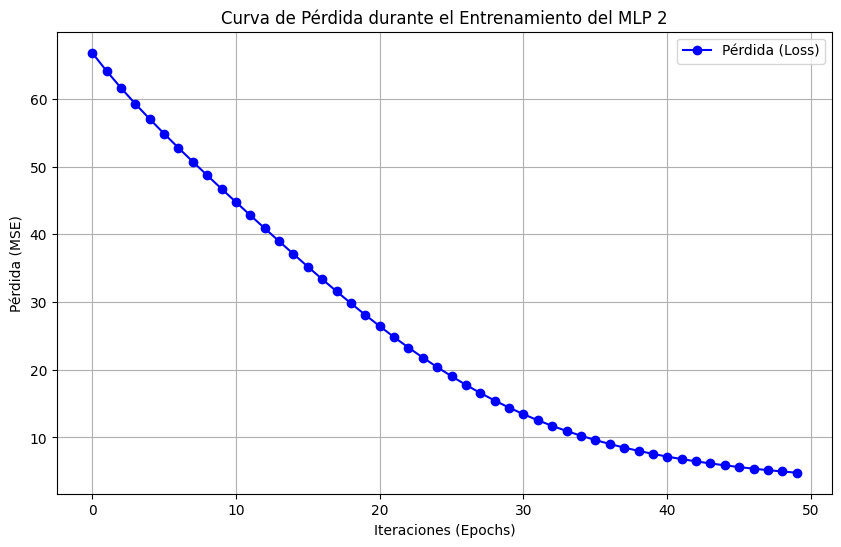


== MLP - Underfitting model 3, con hidden_layer_sizes = (9,) ==
R2   -> train: -2.2341 | test: -2.0716
MSE -> train: 4.4753 | test: 4.5940
MAE  -> train: 1.6236 | test: 1.6459
Diferencia R² -> (train-test): -0.1625


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


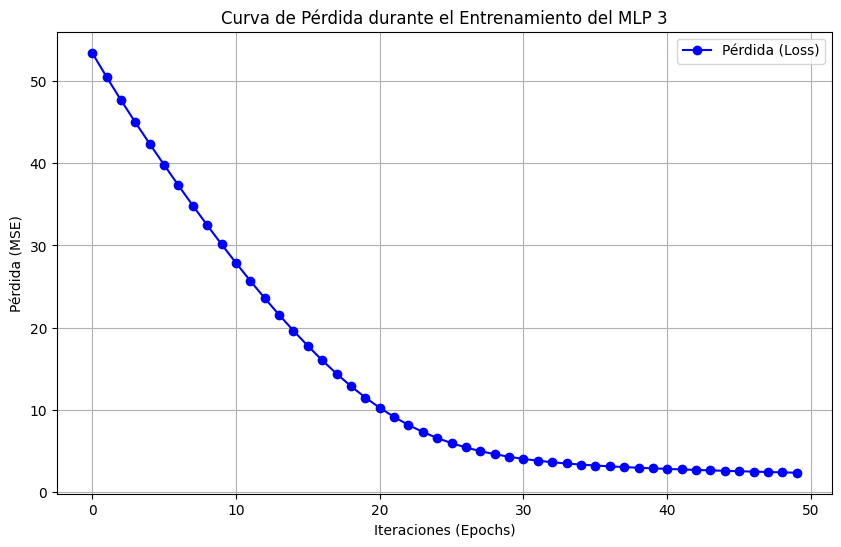


== MLP - Underfitting model 4, con hidden_layer_sizes = (12,) ==
R2   -> train: -2.9556 | test: -2.5504
MSE -> train: 5.4737 | test: 5.3102
MAE  -> train: 1.8215 | test: 1.8013
Diferencia R² -> (train-test): -0.4052


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


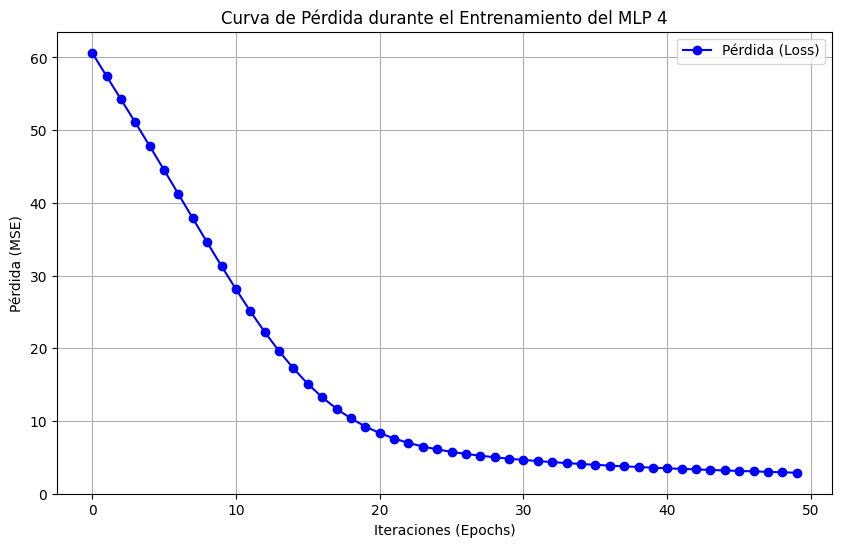

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



== MLP - Underfitting model 5, con hidden_layer_sizes = (16,) ==
R2   -> train: -1.6463 | test: -1.2835
MSE -> train: 3.6619 | test: 3.4152
MAE  -> train: 1.4921 | test: 1.4676
Diferencia R² -> (train-test): -0.3628


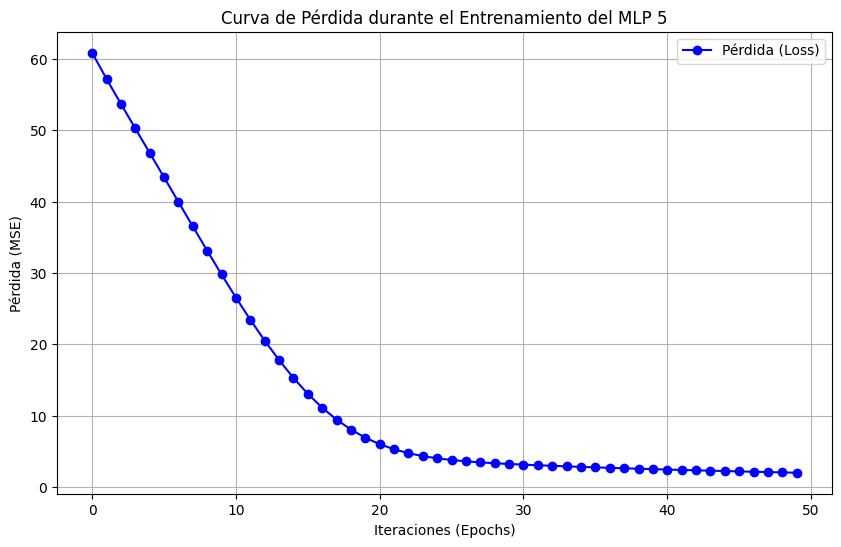

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



== MLP - Underfitting model 6, con hidden_layer_sizes = (20,) ==
R2   -> train: -0.3226 | test: -0.1783
MSE -> train: 1.8302 | test: 1.7624
MAE  -> train: 1.0418 | test: 1.0254
Diferencia R² -> (train-test): -0.1443


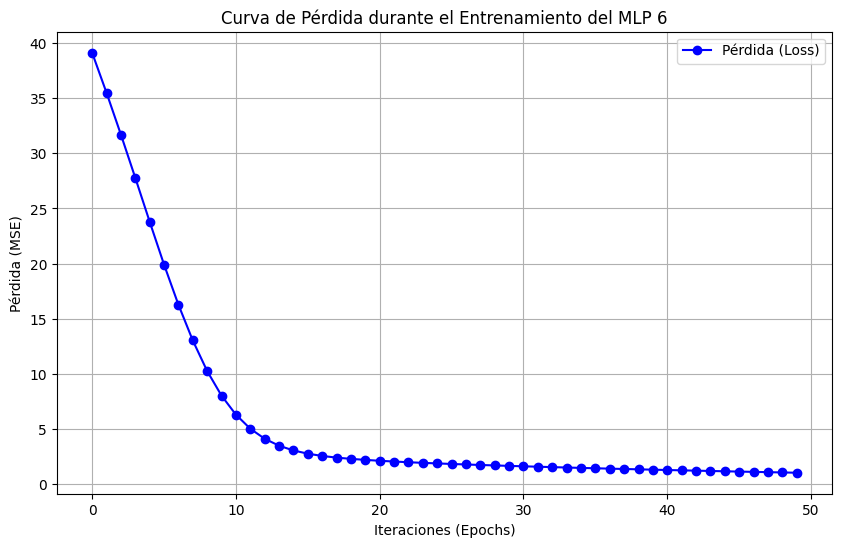

In [31]:
# Defino hiperparámetros para analizar el comportamiento del modelo y el subajuste
underfit_hidden_layer_configurations = [(1,), (3,), (6,), (9,), (12,), (16,), (20,)]  # reduzco las neuronas/ capas ocultas intencionalmente

# inicializo listas donde recopilo métricas para luego graficarlas o analizarlas
mse_train_list_underfit = []   # MSE en entrenamiento por configuración
mse_test_list_underfit = []    # MSE en prueba por configuración
r2_train_list_underfit = []    # R² en entrenamiento por configuración
r2_test_list_underfit = []     # R² en prueba por configuración
mae_train_list_underfit = []   # MAE en entrenamiento para cada configuración
mae_test_list_underfit = []    # MAE en test para cada configuración

# preparo las etiquetas para el eje X a partir de las tuplas de configuración
config_labels_underfit = [f"{layer}" for layer in underfit_hidden_layer_configurations]

# itero sobre cada configuración de capas ocultas pensada para provocar underfitting
for i, layer in enumerate(underfit_hidden_layer_configurations):
    # creo un MLP con muy pocos parámetros útiles y alta regularización -> subajuste esperado
    mlp_underfitting = MLPRegressor(
        hidden_layer_sizes=layer,   # arquitectura de capas ocultas actual (tupla con tamaño por capa)
        activation='relu',          # función de activación estándar
        solver='adam',              # optimizador adaptativo eficiente
        alpha=1.0,                  # regularización muy alta -> dificulta el ajuste
        max_iter=50,                # pocas iteraciones -> aprendizaje insuficiente
        random_state=42)

    # entreno el modelo y obtengo métricas/predicciones usando la función auxiliar
    res = entrenar_e_imprimir(
        mlp_underfitting,
        X_train_scaled, y_train,
        X_test_scaled, y_test,
        f"MLP - Underfitting model {i}, con hidden_layer_sizes = {layer}")

    # agrego las métricas obtenidas a las listas para su posterior análisis o graficado
    mse_train_list_underfit.append(res['m_tr']['mse'])
    mse_test_list_underfit.append(res['m_te']['mse'])
    r2_train_list_underfit.append(res['m_tr']['r2'])
    r2_test_list_underfit.append(res['m_te']['r2'])
    mae_train_list_underfit.append(res['m_tr']["mae"])
    mae_test_list_underfit.append(res['m_te']["mae"])

    # Graficar la curva de pérdida durante el entrenamiento
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    plt.plot(mlp_underfitting.loss_curve_, marker='o', color='blue', label='Pérdida (Loss)')  # Traza la curva con marcadores
    plt.title(f'Curva de Pérdida durante el Entrenamiento del MLP {i}')  # Título
    plt.xlabel('Iteraciones (Epochs)')  # Eje X
    plt.ylabel('Pérdida (MSE)')  # Eje Y
    plt.legend()  # Muestra la leyenda
    plt.grid(True)  # Activa la cuadrícula
    plt.show()  # Muestra el gráfico

Los resultados muestran claramente subajuste. Todos los modelos tienen R² negativos, resaltando particularmente el más pequeño (hidden_layer_sizes=(1,)) con R² de entrenamiento ≈ −81, lo que indica que el modelo predice peor que la media del target. Conforme se aumento el número de neuronas la performance mejora (R² se acerca a 0, MSE/MAE disminuyen), pero incluso la mejor de estas configuraciones sigue teniendo R² cercano a 0 o negativo, por lo que ninguna configuración aprendió bien la relación entre características y target, tambien adicionalmente, los gráficos de la curva de pérdida durante el entrenamiento refuerzan esta evidencia de subajuste, ya que en los modelos más simples, la pérdida (MSE) inicia en valores muy altos y desciende de manera gradual pero insuficiente, estabilizándose en niveles elevados sin alcanzar una convergencia óptima, mientras que a medida que aumenta la complejidad, la pérdida inicial es menor y baja más rápidamente hacia valores cercanos a 0, pero aún muestra un aplanamiento prematuro en valores no mínimos, indicando que el modelo carece de capacidad para capturar patrones complejos.

indicadores que resaltan el subajuste

R² negativo en train y test → el modelo es peor que la predicción por la media.

MSE y MAE decrecen al aumentar la capacidad (más neuronas), lo que muestra que la arquitectura era demasiado simple al principio.

Las diferencias entre R² train y test son pequeñas (train ≈ test) → no es overfitting sino que ambos conjuntos están mal explicados (subajuste).

Las repetidas ConvergenceWarning indican que el optimizador no alcanzó convergencia con max_iter=50, lo que empeora el aprendizaje.


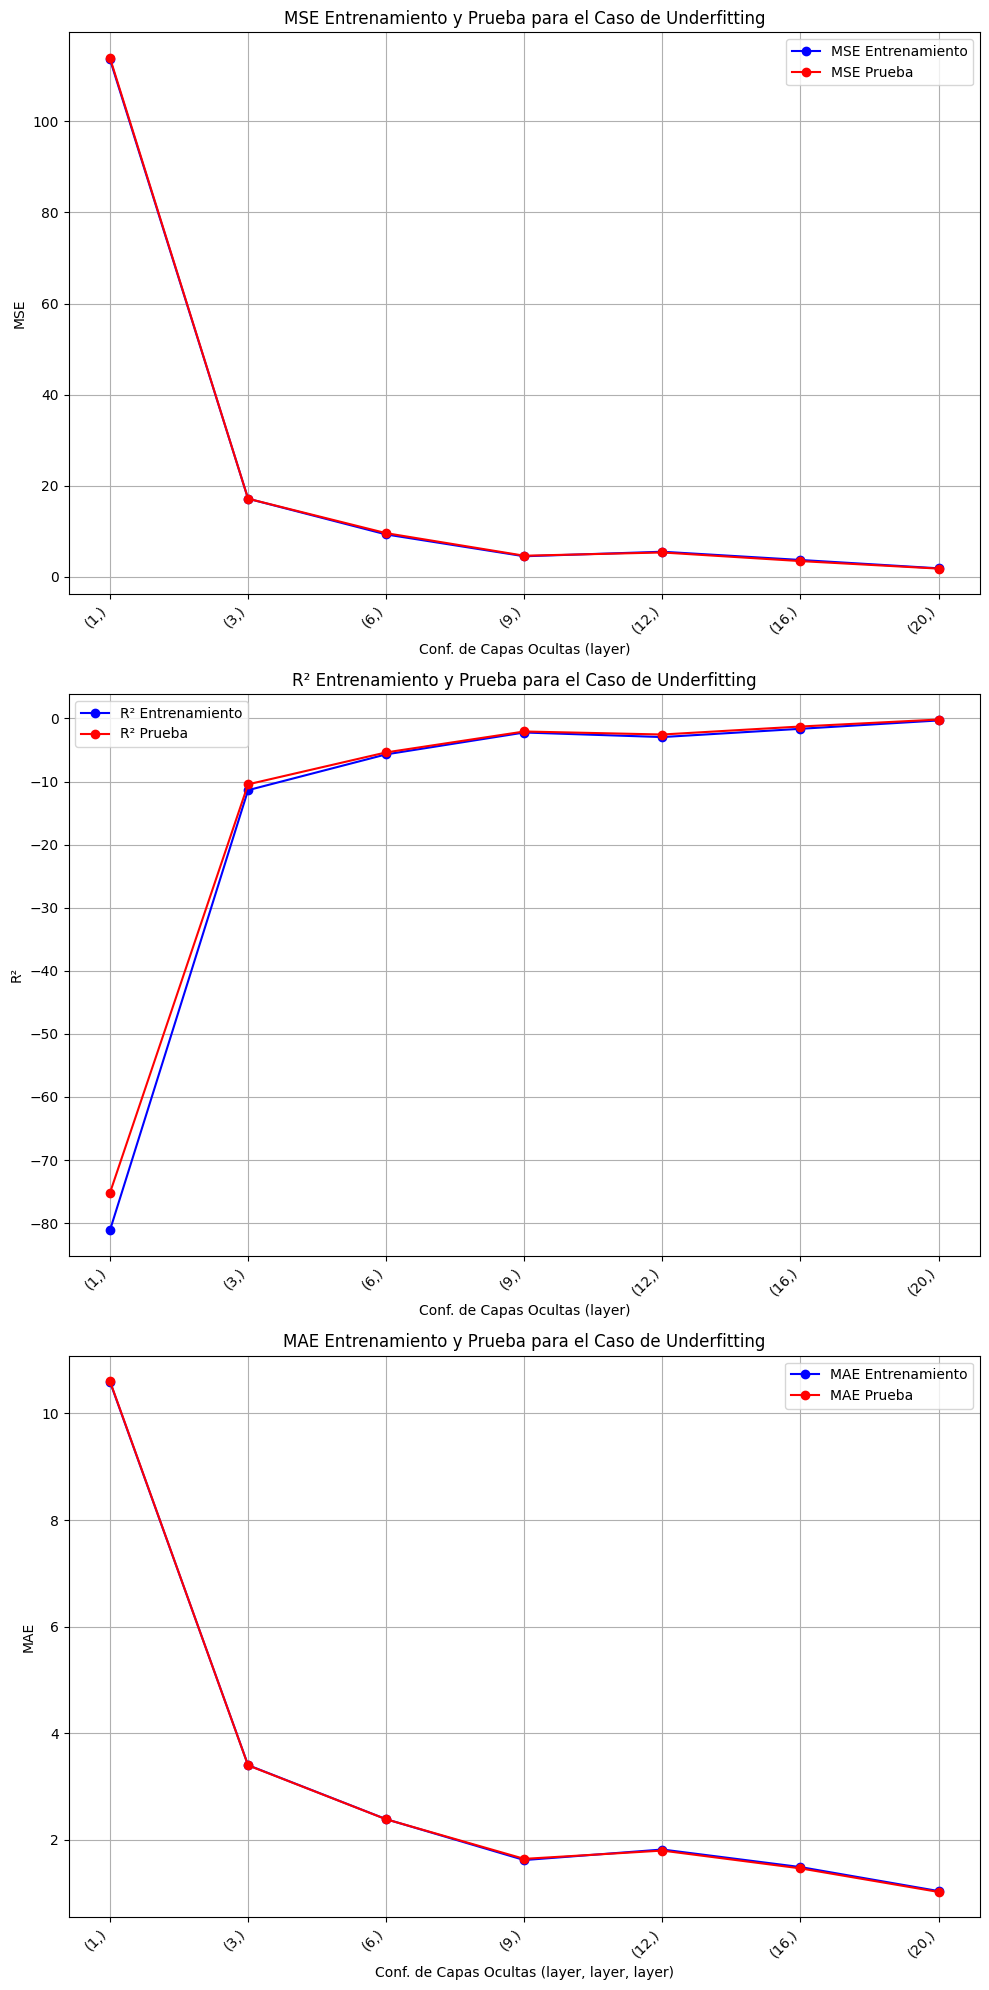

In [32]:
# creo las figuras para cada metrica
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# ---------------------
# Gráfico superior: MSE
# ---------------------

# trazo MSE de entrenamiento como línea con marcadores
axs[0].plot(range(len(config_labels_underfit)), mse_train_list_underfit, marker='o', color='blue', label='MSE Entrenamiento')
# trazo MSE de prueba como línea con marcadores
axs[0].plot(range(len(config_labels_underfit)), mse_test_list_underfit, marker='o', color='red', label='MSE Prueba')
# establezco el título del subplot superior
axs[0].set_title('MSE Entrenamiento y Prueba para el Caso de Underfitting')
# etiqueto el eje X del subplot superior
axs[0].set_xlabel('Conf. de Capas Ocultas (layer)')
# etiqueto el eje Y del subplot superior
axs[0].set_ylabel('MSE')
# defino las posiciones de las marcas del eje X (0..n-1)
axs[0].set_xticks(range(len(config_labels_underfit)))
# asigno las etiquetas (las tuplas de configuración) y las giro para mejor lectura
axs[0].set_xticklabels(config_labels_underfit, rotation=45, ha='right')
# muestro la leyenda para distinguir entrenamiento vs prueba
axs[0].legend()
# activo la cuadrícula para facilitar la lectura de valores
axs[0].grid(True)

# ---------------------
# Gráfico inferior: R²
# ---------------------

# trazo R² de entrenamiento como línea con marcadores
axs[1].plot(range(len(config_labels_underfit)), r2_train_list_underfit, marker='o', color='blue', label='R² Entrenamiento')
# trazo R² de prueba como línea con marcadores
axs[1].plot(range(len(config_labels_underfit)), r2_test_list_underfit, marker='o', color='red', label='R² Prueba')
# establezco el título del subplot inferior
axs[1].set_title('R² Entrenamiento y Prueba para el Caso de Underfitting')
# etiqueto el eje X del subplot inferior
axs[1].set_xlabel('Conf. de Capas Ocultas (layer)')
# etiqueto el eje Y del subplot inferior
axs[1].set_ylabel('R²')
# defino las posiciones de las marcas del eje X (0..n-1)
axs[1].set_xticks(range(len(config_labels_underfit)))
# asigno las etiquetas (las tuplas de configuración) y las giro para mejor lectura
axs[1].set_xticklabels(config_labels_underfit, rotation=45, ha='right')
# muestro la leyenda para distinguir entrenamiento vs prueba
axs[1].legend()
# activo la cuadrícula para facilitar la lectura de valores
axs[1].grid(True)

# ---------------------
# Gráfico 3: MAE
# ---------------------

# trazo MAE de entrenamiento y prueba
axs[2].plot(range(len(config_labels_underfit)), mae_train_list_underfit, marker='o', color='blue', label='MAE Entrenamiento')
axs[2].plot(range(len(config_labels_underfit)), mae_test_list_underfit, marker='o', color='red', label='MAE Prueba')
# título y etiquetas
axs[2].set_title('MAE Entrenamiento y Prueba para el Caso de Underfitting')
axs[2].set_xlabel('Conf. de Capas Ocultas (layer, layer, layer)')
axs[2].set_ylabel('MAE')
# marcas x y etiquetas rotadas
axs[2].set_xticks(range(len(config_labels_underfit)))
axs[2].set_xticklabels(config_labels_underfit, rotation=45, ha='right')
# leyenda y grid
axs[2].legend()
axs[2].grid(True)

# ajusto el layout para evitar solapamientos entre subplots y etiquetas
plt.tight_layout()
# muestro la figura en pantalla
plt.show()

Los gráficos confirman lo que mostraban las métricas numéricas: los modelos con pocas neuronas están claramente subajustados. Al aumentar la capacidad (más neuronas en la capa oculta) tanto el MSE como el MAE disminuyen drásticamente y el R² mejora acercándose a 0, pero sigue siendo muy bajo (o levemente negativo) incluso en la mejor configuración que fue en la capa (20,). Además, las curvas de entrenamiento y de prueba están prácticamente solapadas en todos los gráficos, lo que indica baja varianza y alto sesgo: el modelo no está logrando aprender la relación entre las features y el target, por lo cual el modelo esta subajustado.

# MLP que funciona de forma aceptable

In [33]:
# importo RandomizedSearchCV para realizar búsqueda aleatoria de hiperparámetros con validación cruzada
from sklearn.model_selection import RandomizedSearchCV
# importo expon para definir una distribución exponencial usada al muestrear valores continuos (p. ej. alpha)
from scipy.stats import expon

# instancio un MLPRegressor base; los hiperparámetros serán muestreados por RandomizedSearchCV
mlp = MLPRegressor(solver='adam', random_state=42)

# defino el espacio/distribuciones de búsqueda para los hiperparámetros
param_dist = {
    # distintas arquitecturas de capas ocultas a evaluar (tuplas con tamaño por capa)
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50), (200, 100)],
    # distribución exponencial para alpha (regularización); favorece valores pequeños
    'alpha': expon(scale=1e-3),
    # tasas de aprendizaje iniciales candidatas
    'learning_rate_init': [1e-3, 5e-4, 1e-4],
    # funciones de activación a probar
    'activation': ['relu', 'tanh'],
    # uso early stopping para que algunos runs paren automáticamente si no hay mejora
    'early_stopping': [True]}

# creo el RandomizedSearchCV para muestrear combinaciones del espacio definido
rand = RandomizedSearchCV(
    estimator=mlp,                  # modelo base a optimizar
    param_distributions=param_dist, # espacio/distribuciones de búsqueda
    n_iter=30,                      # número de combinaciones aleatorias a probar
    scoring='r2',                   # métrica usada para comparar modelos (R²)
    cv=5,                           # cross-validation con 5 folds
    n_jobs=-1,                      # uso todos los cores disponibles para paralelizar
    verbose=2,                      # muestro información del progreso
    random_state=42,                # semilla para reproducibilidad de la búsqueda aleatoria
    refit=True)                     # re-entreno el mejor modelo sobre todo el set de entrenamiento


# ejecuto la búsqueda aleatoria sobre los datos de entrenamiento
rand.fit(X_train_scaled, y_train)

# imprimo el mejor score promedio en CV y los mejores hiperparámetros encontrados
print("Mejor score (R2):", rand.best_score_)
print("Mejores parámetros:", rand.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejor score (R2): 0.8758484946902897
Mejores parámetros: {'activation': 'tanh', 'alpha': np.float64(7.790692366582296e-07), 'early_stopping': True, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate_init': 0.001}


Se aplicó RandomizedSearchCV con validación cruzada de 5 folds, explorando 30 combinaciones aleatorias de parámetros (150 ajustes en total). El mejor modelo alcanzó un score promedio R² = 0.8758, reflejando un buen equilibrio entre sesgo y varianza.

Los mejores hiperparámetros encontrados fueron:
activation='tanh', alpha=np.float64(7.790692366582296e-07), early_stopping=True, hidden_layer_sizes=(150, 100, 50), learning_rate_init=0.001.

Esta configuración resultó la más estable y generalizable, sirviendo de base para el modelo final.

In [34]:
# defino el modelo MLP con los parámetros que resultaron de la búsqueda/validación
mlp = MLPRegressor(
    activation="tanh",                                 # elijo la función de activación hiperbólica tanh (más suave que relu)
    hidden_layer_sizes=(150, 100, 50),                # establezco la arquitectura: 3 capas ocultas con 150,100 y 50 neuronas
    alpha=np.float64(7.790692366582296e-07),          # regularización L2 muy pequeña (float64 explícito para precisión)
    early_stopping=True,                               # activo early stopping para detener si no mejora la validación
    learning_rate_init=0.001,                         # tasa de aprendizaje inicial seleccionada
    solver='adam',                                    # uso el optimizador Adam (adaptativo, eficiente)
    random_state=42)                                   # fijo la semilla para resultados reproducibles

# entreno el modelo y muestro métricas/predicciones usando la función auxiliar previamente definida
res = entrenar_e_imprimir(
    mlp,
    X_train_scaled, y_train,
    X_test_scaled, y_test,
    "MLP estable")                                    # nombre descriptivo para la salida impresa


== MLP estable ==
R2   -> train: 0.9002 | test: 0.9008
MSE -> train: 0.1381 | test: 0.1484
MAE  -> train: 0.2776 | test: 0.2936
Diferencia R² -> (train-test): -0.0006


En este experimento se obtuvo un modelo MLP con comportamiento estable y buena capacidad de generalización. Los valores de R² son prácticamente idénticos entre entrenamiento y prueba (R²_train = 0.9002; R²_test = 0.9008), con una diferencia mínima (ΔR² = −0.0006), lo que indica que el modelo no sufre sobreajuste ni subajuste. Los errores también son similares entre ambos conjuntos (MSE_train 0.1381 vs MSE_test 0.1484; MAE_train 0.2776 vs MAE_test 0.2936), confirmando una generalización equilibrada.

Indicadores que muestran estabilidad

R²_train ≈ R²_test → excelente generalización y ausencia de sobreajuste.

MSE y MAE muy parecidos en train y test → error estable.

La diferencia mínima de R² (−0.0006) muestra un ajuste bastante bueno entre ambas fases, señal de que la arquitectura (150, 100, 50) con regularización y early stopping logró un balance óptimo entre complejidad y capacidad de generalización.

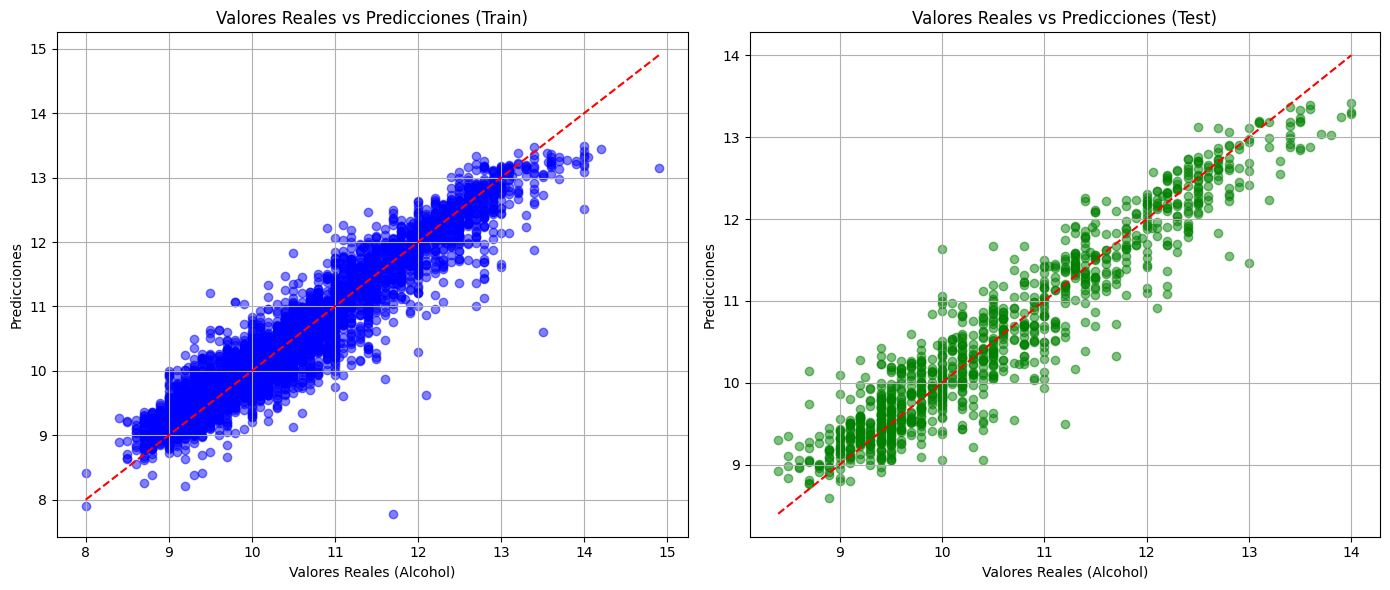

In [35]:
# grafico para MLP aceptable
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Subplot para Train
axs[0].scatter(y_train, res["y_pred_tr"], color='blue', alpha=0.5)  # Puntos: real vs predicho
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Línea y=x ideal
axs[0].set_title('Valores Reales vs Predicciones (Train)')  # Título
axs[0].set_xlabel('Valores Reales (Alcohol)')  # Eje X (ajusta según tu target)
axs[0].set_ylabel('Predicciones')  # Eje Y
axs[0].grid(True)  # Cuadrícula

# Subplot para Test
axs[1].scatter(y_test, res["y_pred_te"], color='green', alpha=0.5)  # Puntos: real vs predicho
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea y=x ideal
axs[1].set_title('Valores Reales vs Predicciones (Test)')  # Título
axs[1].set_xlabel('Valores Reales (Alcohol)')  # Eje X
axs[1].set_ylabel('Predicciones')  # Eje Y
axs[1].grid(True)  # Cuadrícula

plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()  # Muestra el gráfico

los gráficos de valores reales vs predicciones refuerzan esta evidencia de estabilidad: en ambos conjuntos (train en azul y test en verde), los puntos se alinean estrechamente alrededor de la línea diagonal roja (y=x), con una dispersión mínima y sin patrones sistemáticos de desviación, lo que confirma predicciones precisas y consistentes. La similitud visual entre los subplots de train y test indica baja varianza y un buen equilibrio de sesgo, sin brechas que sugieran overfitting.

# 2.5 Agregue sus conclusiones comparando la experiencia y resultados del modelo de regresión lineal con el modelo del punto 2.4

## Conclusión:
al comparar el modelo de regresión lineal con el perceptrón multicapa (MLP) estable del punto 2.4, se observan diferencias notables tanto en los resultados como en la experiencia de implementación. En términos de rendimiento, la regresión lineal logra un R² de 0.8059 en entrenamiento y 0.8560 en prueba, con MSE de 0.2686 y 0.2154 respectivamente, lo que indica un ajuste moderado y una buena generalización (incluso mejor en prueba, sin signos de sobreajuste). Sin embargo, el MLP supera estos valores con un R² de aproximadamente 0.900 en ambos conjuntos (train: 0.9002, test: 0.9008), MSE más bajo (train: 0.1381, test: 0.1484) y MAE reducido (train: 0.2776, test: 0.2936), demostrando una capacidad superior para capturar patrones no lineales en el dataset Wine Quality, donde variables como la densidad y el alcohol exhiben relaciones complejas.
Desde el punto de vista de la experiencia, la regresión lineal es más sencilla y rápida de implementar: no requiere ajuste de hiperparámetros extenso, es computacionalmente ligera y altamente interpretable (los coeficientes permiten identificar la importancia de variables como la densidad, que muestra una fuerte correlación negativa con el alcohol). En contraste, el MLP demanda una búsqueda exhaustiva de hiperparámetros (usando RandomizedSearchCV para optimizar capas ocultas, activación 'tanh', alpha y learning rate), consume más recursos y actúa como una "caja negra", dificultando la interpretación de cómo las features influyen en las predicciones. No obstante, esta complejidad vale la pena para datasets con no linealidades.

### diferencias entre metricas de test de los modelos regresion y MLP:

Reducción del MSE (test): de 0.2154 → 0.1484 → ≈ 31.1% menos.

Reducción del MAE (test): de 0.360 → 0.2936 → ≈ 18.4% menos.

Mejora en R² (test): de 0.8560 → 0.9008 → +0.0448 (aumento absoluto), ≈ 5.2% relativo sobre 0.8560.

Las mejoras son significativas, especialmente la reducción del 31% en el MSE, que indica que el modelo de MLP comete errores cuadráticos bastante menores.

# Recursos utilizados
las clases grabadas, el material de los notebooks, y la documentacion de la libreria de scikit-learn